In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('census-income.csv')

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


# Problem Statement:-

# This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [4]:
df.shape

(32560, 15)

In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [7]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [8]:
df.groupby('Native_country')['Race'].value_counts()

Native_country  Race               
 ?               White                 386
                 Black                  96
                 Asian-Pac-Islander     83
                 Other                  18
 Cambodia        Asian-Pac-Islander     18
                                      ... 
 United-States   Asian-Pac-Islander    292
                 Other                 129
 Vietnam         Asian-Pac-Islander     65
                 White                   2
 Yugoslavia      White                  16
Name: Race, Length: 112, dtype: int64

# Observation:- Native country has missing value that consist of various Races

In [9]:
index=np.where([df['Native_country']==' ?'])[1]

In [10]:
index

array([   13,    37,    50,    60,    92,   244,   248,   296,   392,
         452,   556,   711,   724,   728,   776,   779,   886,   954,
        1025,  1035,  1114,  1151,  1157,  1198,  1223,  1251,  1325,
        1347,  1390,  1553,  1556,  1580,  1592,  1675,  1710,  1737,
        1817,  1899,  1989,  2014,  2098,  2103,  2180,  2370,  2511,
        2512,  2517,  2548,  2571,  2586,  2590,  2638,  2716,  2734,
        2774,  2793,  2908,  2925,  3022,  3106,  3130,  3163,  3165,
        3186,  3199,  3231,  3246,  3255,  3460,  3483,  3494,  3531,
        3578,  3635,  3833,  3855,  3857,  4005,  4155,  4171,  4196,
        4243,  4300,  4325,  4395,  4404,  4461,  4509,  4577,  4598,
        4638,  4655,  4657,  4670,  4771,  4785,  4826,  5080,  5179,
        5184,  5200,  5233,  5308,  5346,  5373,  5400,  5449,  5539,
        5646,  5662,  5682,  5708,  5822,  5840,  5853,  5962,  6004,
        6058,  6128,  6175,  6185,  6241,  6318,  6359,  6363,  6375,
        6394,  6532,

In [11]:
df.drop(index,axis=0,inplace=True)

In [12]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [13]:
df.duplicated().sum()

23

In [14]:
df[df.duplicated(keep='first')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,0
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,0
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,0
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,0
21489,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,0


In [15]:
df[df.duplicated(keep='last')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
2302,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
3916,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,0
4324,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
4766,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,0
4939,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,1
5578,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
5804,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
5841,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0
6989,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,0
7052,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


In [16]:
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df.shape

(31954, 15)

In [18]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df.groupby('Workclass')['Occupation'].value_counts()

Workclass     Occupation        
 ?             ?                    1809
 Federal-gov   Adm-clerical          316
               Exec-managerial       179
               Prof-specialty        167
               Tech-support           66
                                    ... 
 Without-pay   Craft-repair            1
               Handlers-cleaners       1
               Machine-op-inspct       1
               Other-service           1
               Transport-moving        1
Name: Occupation, Length: 83, dtype: int64

In [20]:
df['Workclass']=df['Workclass'].replace(' ?','Others')
df['Occupation']=df['Occupation'].replace(' ?','Others')

In [21]:
df.groupby('Workclass')['Occupation'].value_counts()

Workclass     Occupation        
 Federal-gov   Adm-clerical          316
               Exec-managerial       179
               Prof-specialty        167
               Tech-support           66
               Craft-repair           63
                                    ... 
 Without-pay   Handlers-cleaners       1
               Machine-op-inspct       1
               Other-service           1
               Transport-moving        1
Others        Others                1809
Name: Occupation, Length: 83, dtype: int64

# EDA

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,31954.0,38.582713,13.659696,17.0,28.00,37.0,48.0,90.0
Fnlwgt,31954.0,189718.724479,105730.700398,12285.0,117627.25,178310.5,237320.0,1484705.0
Education_num,31954.0,10.072260,2.559505,1.0,9.00,10.0,12.0,16.0
Capital_gain,31954.0,1065.092007,7301.278238,0.0,0.00,0.0,0.0,99999.0
Capital_loss,31954.0,86.804500,401.738054,0.0,0.00,0.0,0.0,4356.0
Hours_per_week,31954.0,40.420761,12.344739,1.0,40.00,40.0,45.0,99.0
Income,31954.0,0.240752,0.427547,0.0,0.00,0.0,0.0,1.0


In [23]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21405
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

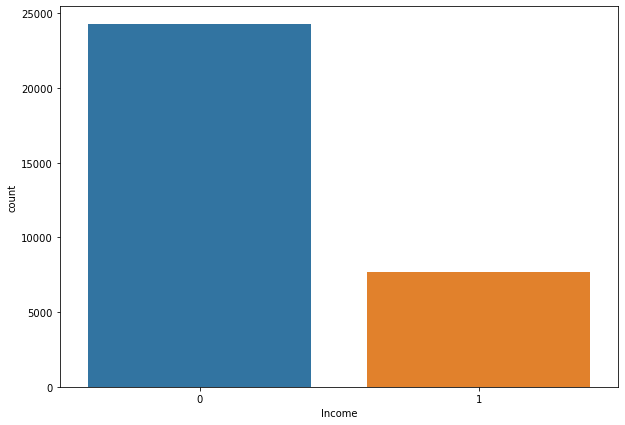

In [24]:
plt.figure(figsize=(10,7))
sns.countplot('Income',data=df)

# Observation:-

Clearly the target variable is imbalanced

<AxesSubplot:xlabel='Education', ylabel='count'>

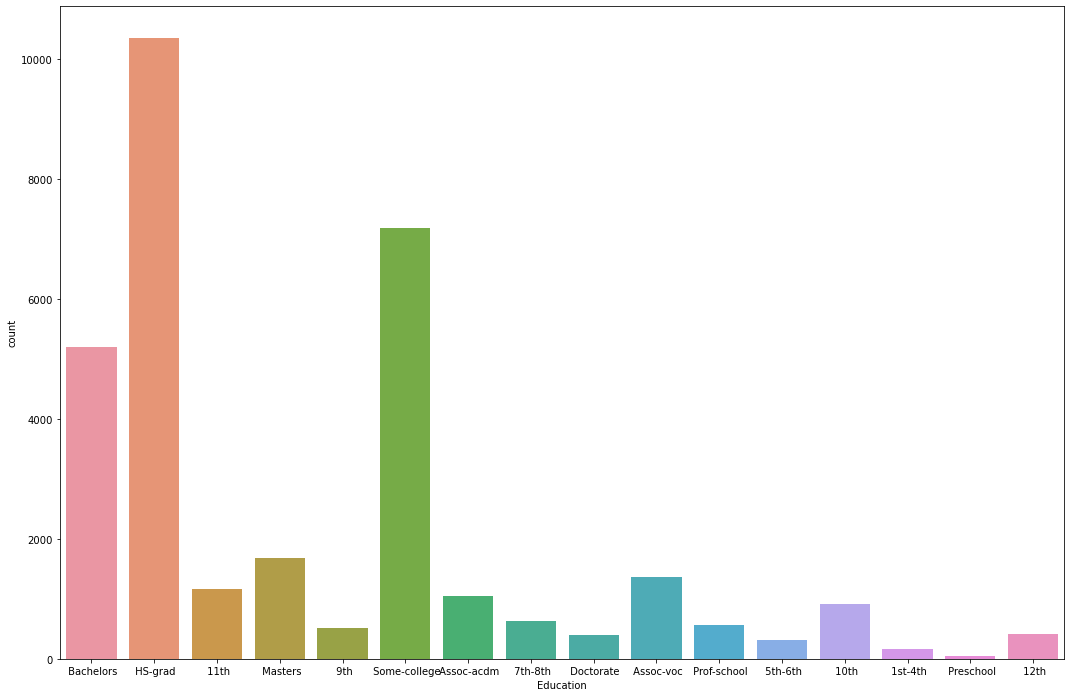

In [25]:
plt.figure(figsize=(18,12))
sns.countplot('Education',data=df)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

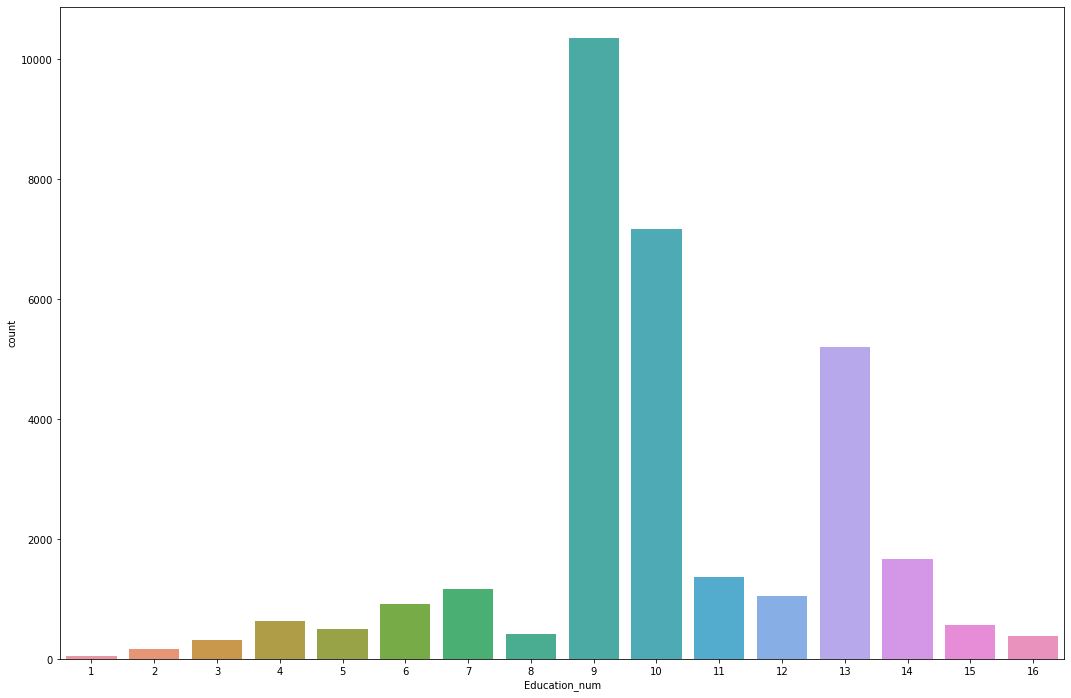

In [26]:
plt.figure(figsize=(18,12))
sns.countplot('Education_num',data=df)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

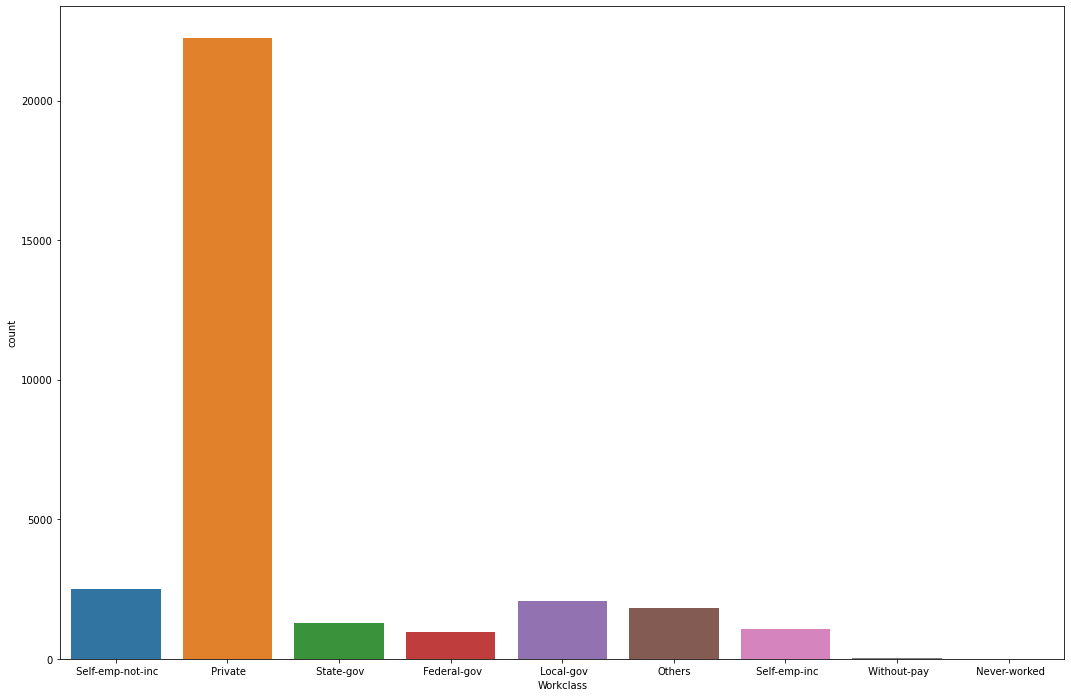

In [27]:
plt.figure(figsize=(18,12))
sns.countplot('Workclass',data=df)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

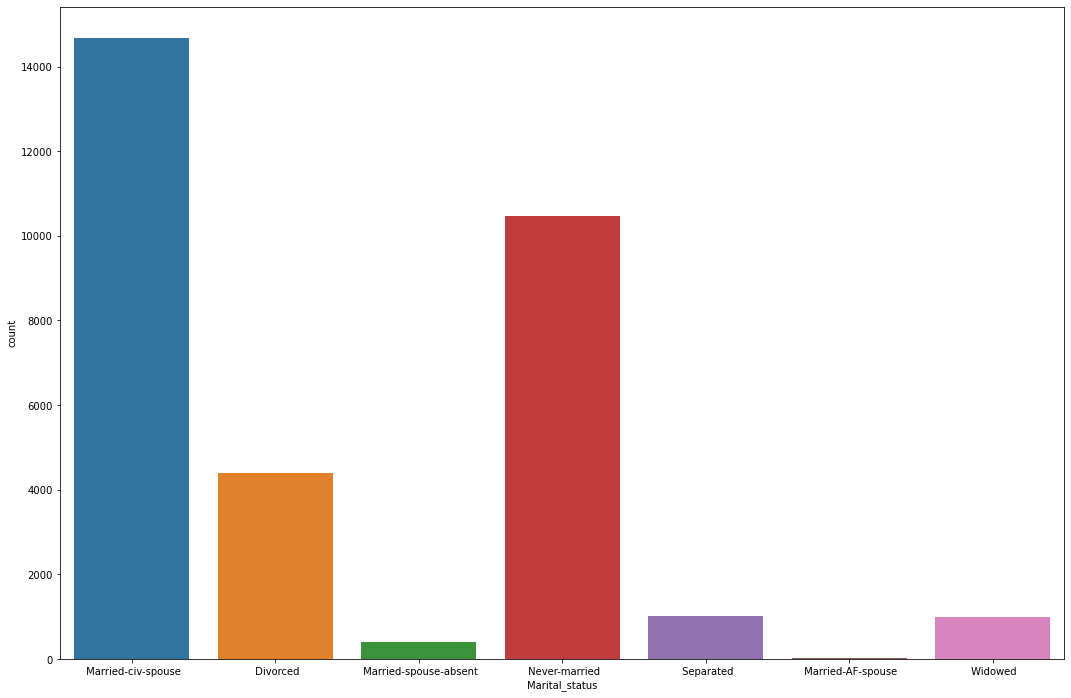

In [28]:
plt.figure(figsize=(18,12))
sns.countplot('Marital_status',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

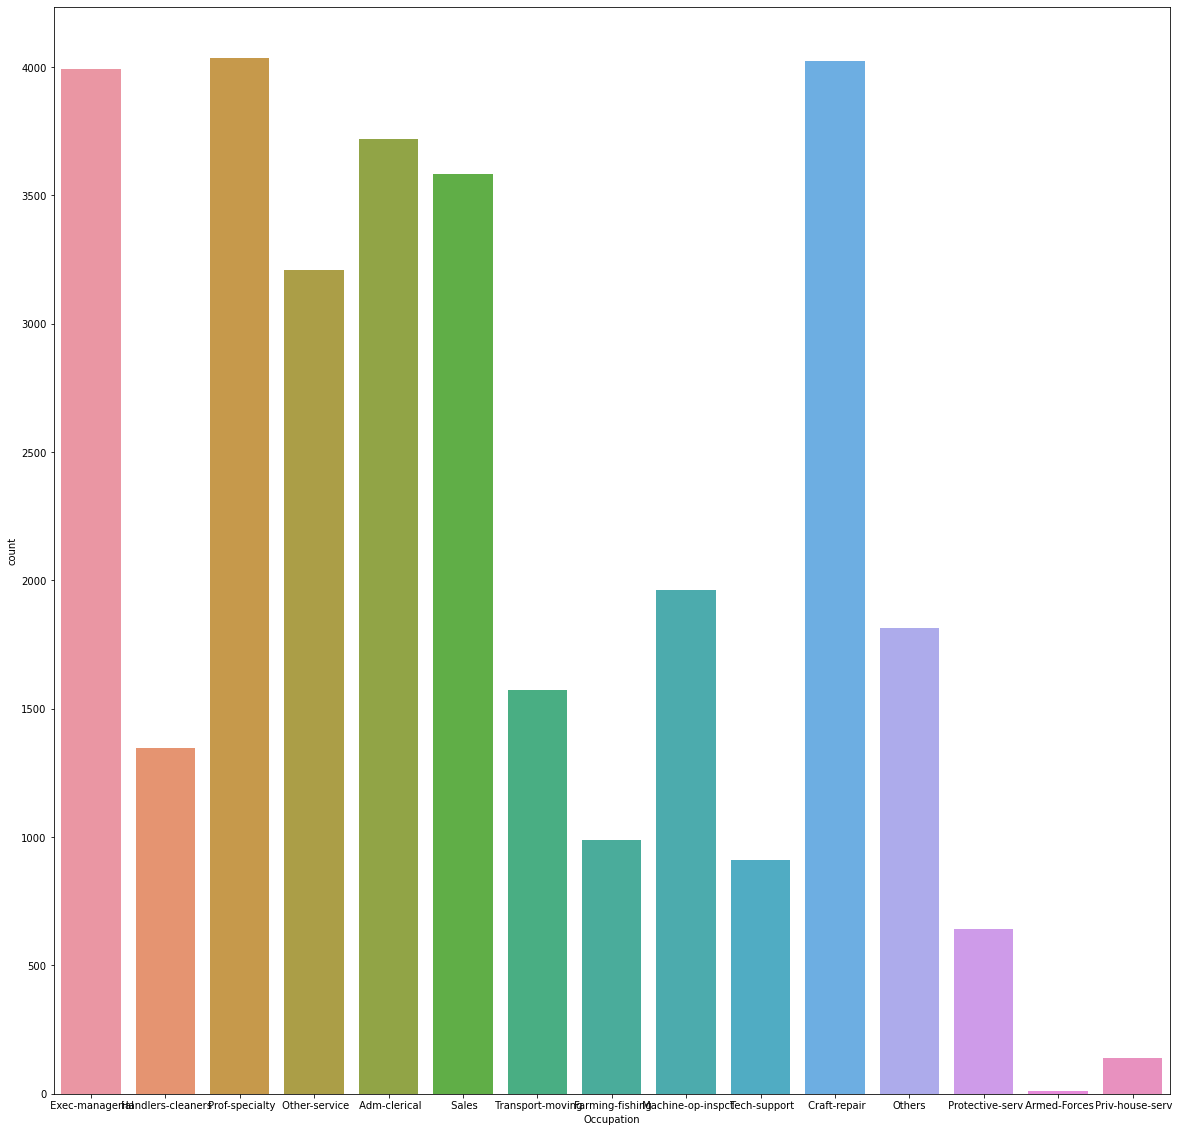

In [29]:
plt.figure(figsize=(20,20))
sns.countplot('Occupation',data=df)

<AxesSubplot:xlabel='Race', ylabel='count'>

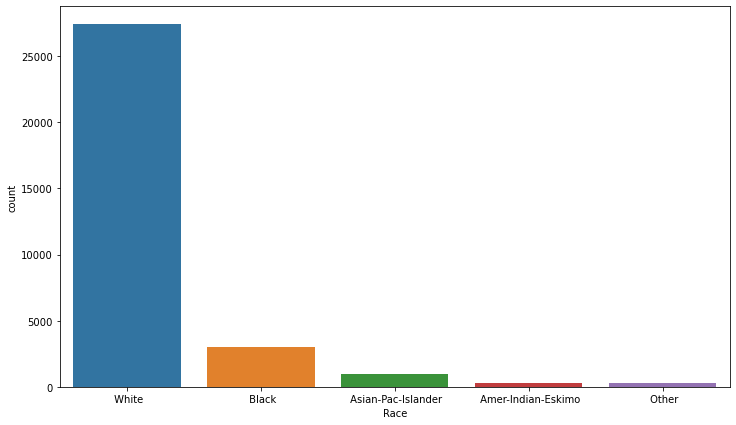

In [30]:
plt.figure(figsize=(12,7))
sns.countplot('Race',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

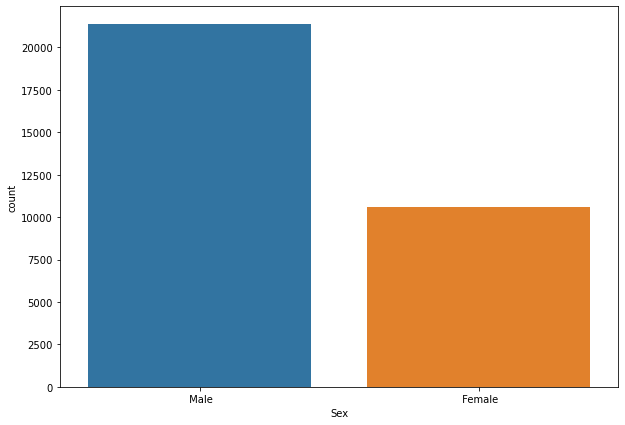

In [31]:
plt.figure(figsize=(10,7))
sns.countplot('Sex',data=df)

# Observation of categorial features:-

1. Education of citizen with Hs.Grad and Some college people has highest number.

2. Number of years in eduaction with 9 and 10 has highest values.

3. Private Workclass has highest number of citizen

4. Married-civ-spouse and Never married has more number.

5. Manager, Professor and craft repair professional has more data.

6. White people is more in numbers.

7. Male earning groups are more in number.

[Text(0, 0, ' United-States'),
 Text(1, 0, ' Cuba'),
 Text(2, 0, ' Jamaica'),
 Text(3, 0, ' India'),
 Text(4, 0, ' Mexico'),
 Text(5, 0, ' South'),
 Text(6, 0, ' Puerto-Rico'),
 Text(7, 0, ' Honduras'),
 Text(8, 0, ' England'),
 Text(9, 0, ' Canada'),
 Text(10, 0, ' Germany'),
 Text(11, 0, ' Iran'),
 Text(12, 0, ' Philippines'),
 Text(13, 0, ' Italy'),
 Text(14, 0, ' Poland'),
 Text(15, 0, ' Columbia'),
 Text(16, 0, ' Cambodia'),
 Text(17, 0, ' Thailand'),
 Text(18, 0, ' Ecuador'),
 Text(19, 0, ' Laos'),
 Text(20, 0, ' Taiwan'),
 Text(21, 0, ' Haiti'),
 Text(22, 0, ' Portugal'),
 Text(23, 0, ' Dominican-Republic'),
 Text(24, 0, ' El-Salvador'),
 Text(25, 0, ' France'),
 Text(26, 0, ' Guatemala'),
 Text(27, 0, ' China'),
 Text(28, 0, ' Japan'),
 Text(29, 0, ' Yugoslavia'),
 Text(30, 0, ' Peru'),
 Text(31, 0, ' Outlying-US(Guam-USVI-etc)'),
 Text(32, 0, ' Scotland'),
 Text(33, 0, ' Trinadad&Tobago'),
 Text(34, 0, ' Greece'),
 Text(35, 0, ' Nicaragua'),
 Text(36, 0, ' Vietnam'),
 Text(37,

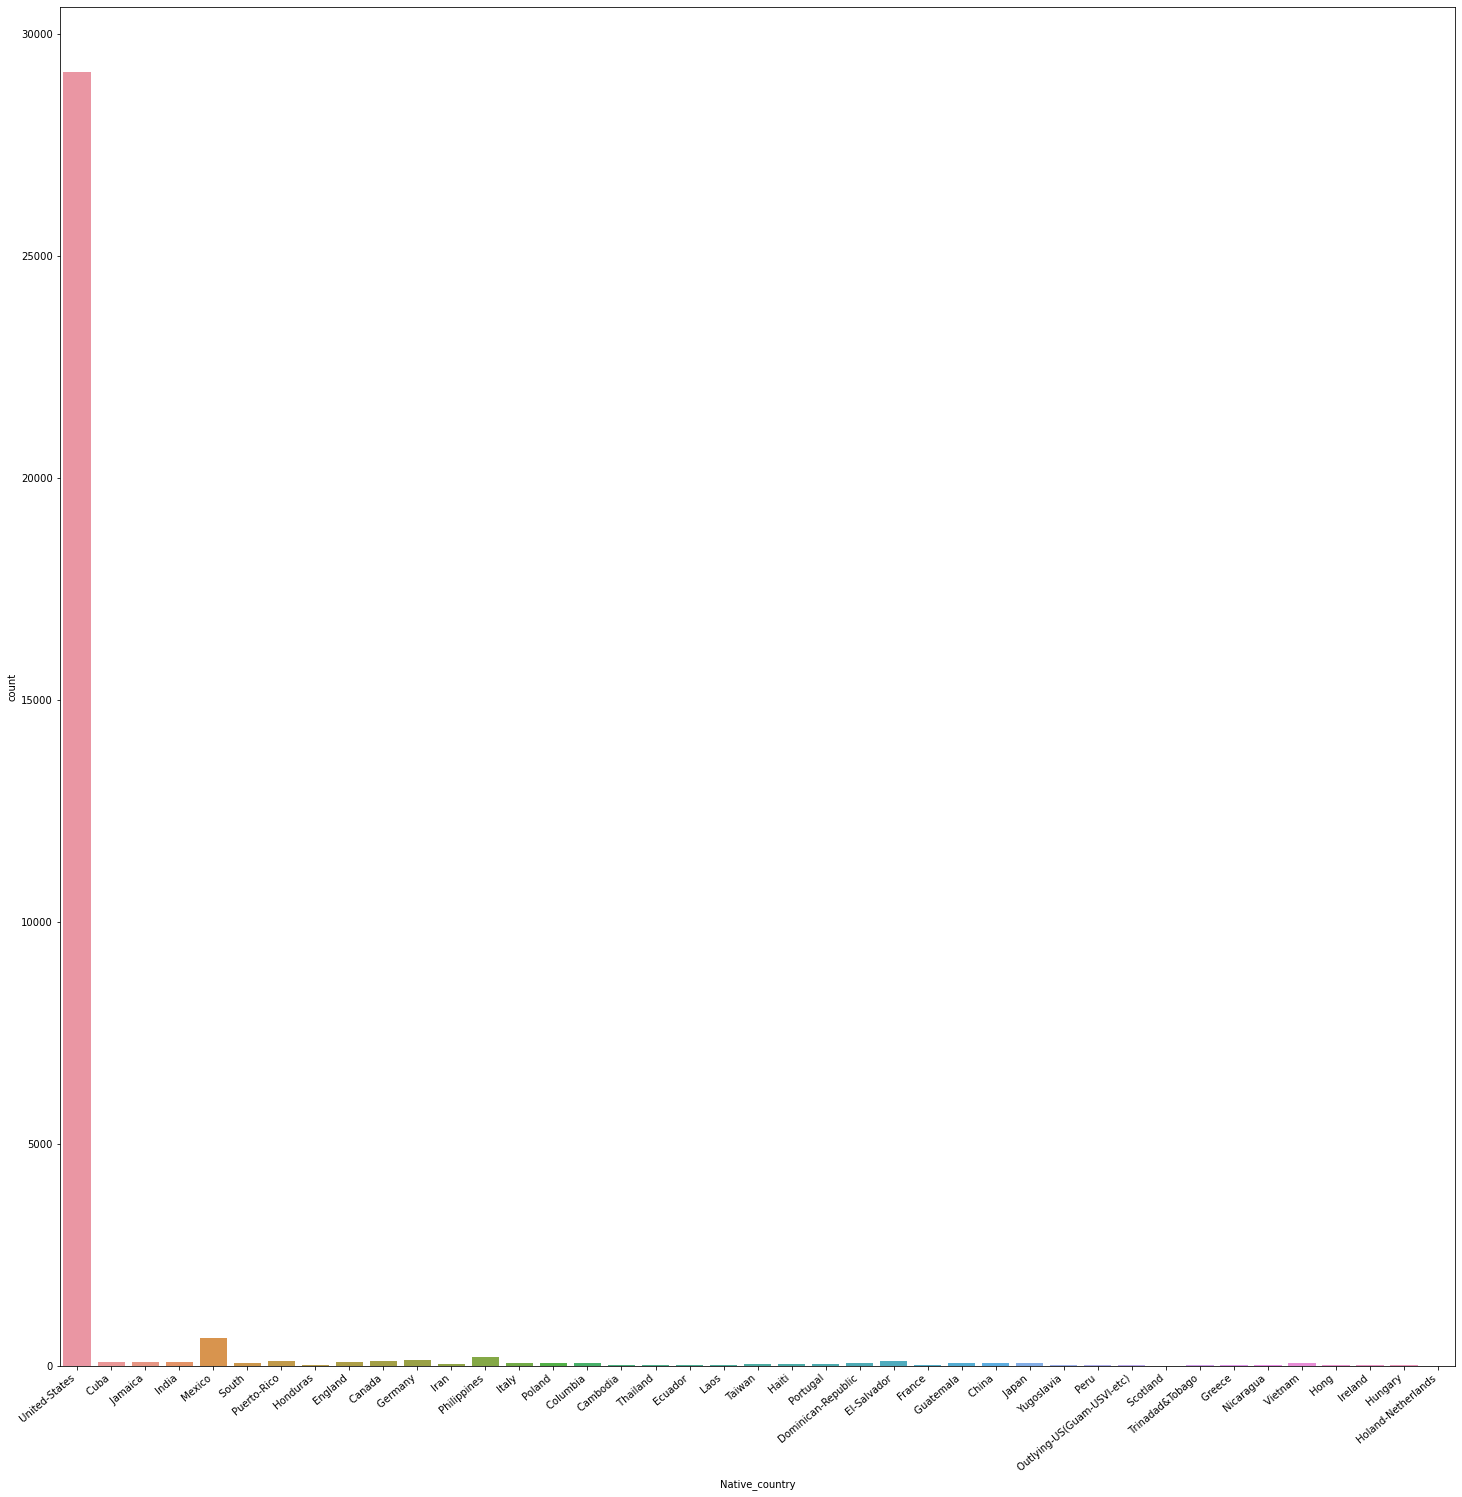

In [32]:
plt.figure(figsize=(25,25))
ax=sns.countplot('Native_country',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Observation:- People with nationality of UnitedStates has higher value

<AxesSubplot:xlabel='Age', ylabel='Income'>

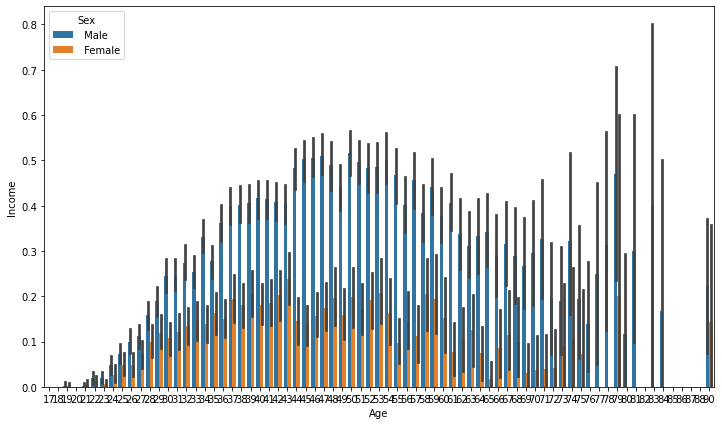

In [33]:
plt.figure(figsize=(12,7))
sns.barplot(x='Age',y='Income',hue='Sex',data=df)

<AxesSubplot:xlabel='Workclass', ylabel='Age'>

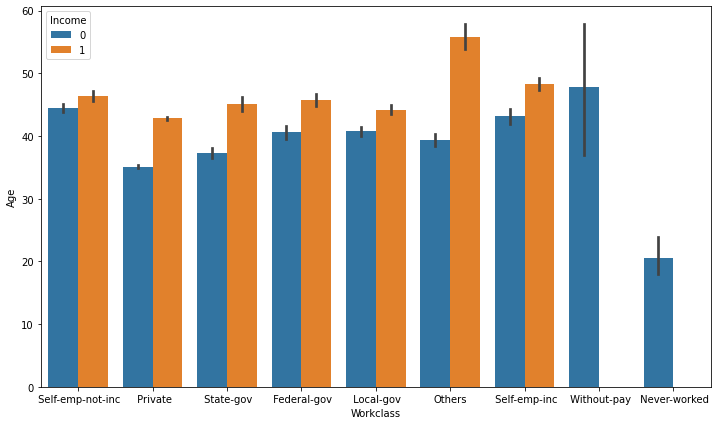

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(x='Workclass',y='Age',hue='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

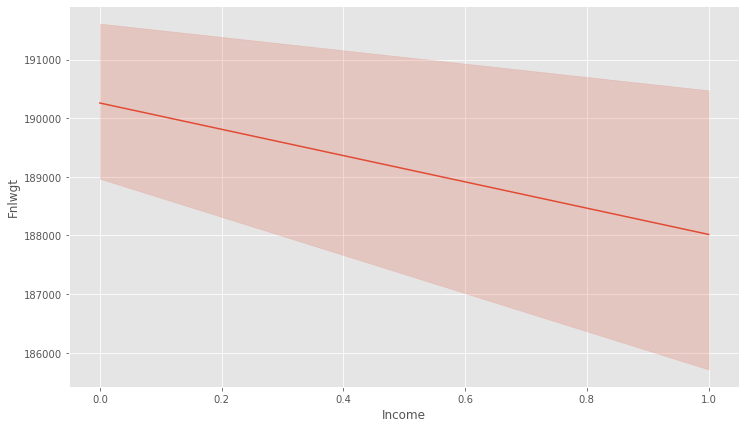

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.lineplot(x='Income',y='Fnlwgt',data=df)

<AxesSubplot:xlabel='Education', ylabel='Education_num'>

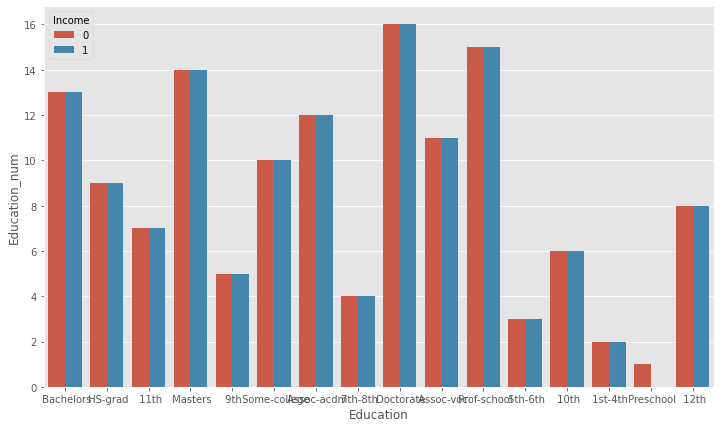

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(x='Education',y='Education_num',hue='Income',data=df)


<AxesSubplot:xlabel='Education', ylabel='Education_num'>

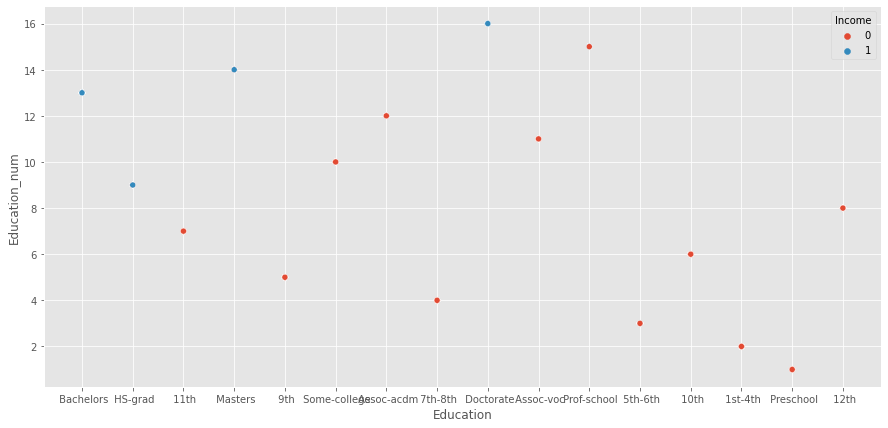

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Education',y='Education_num',hue='Income',data=df)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

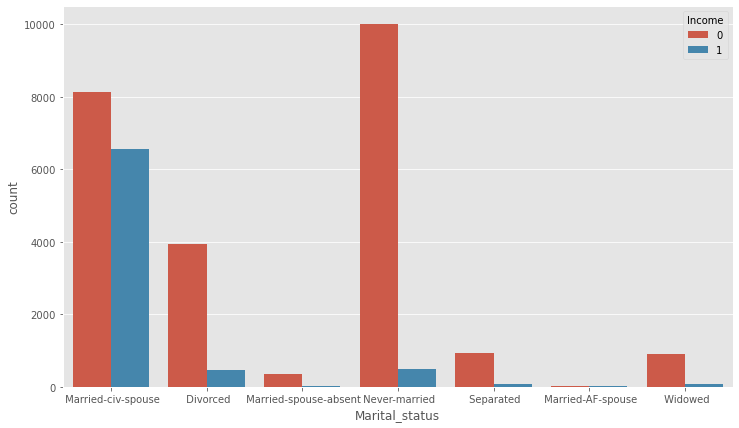

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(x='Marital_status',hue='Income',data=df)

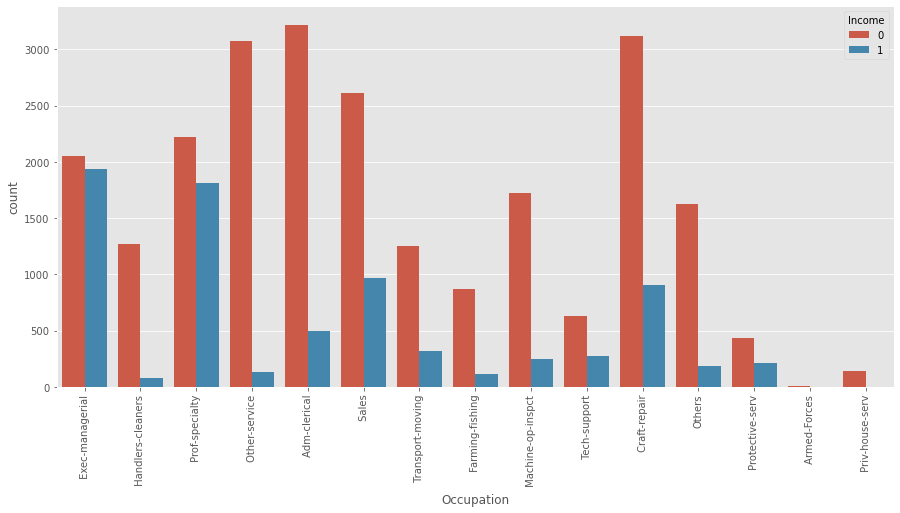

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)
plt.show()

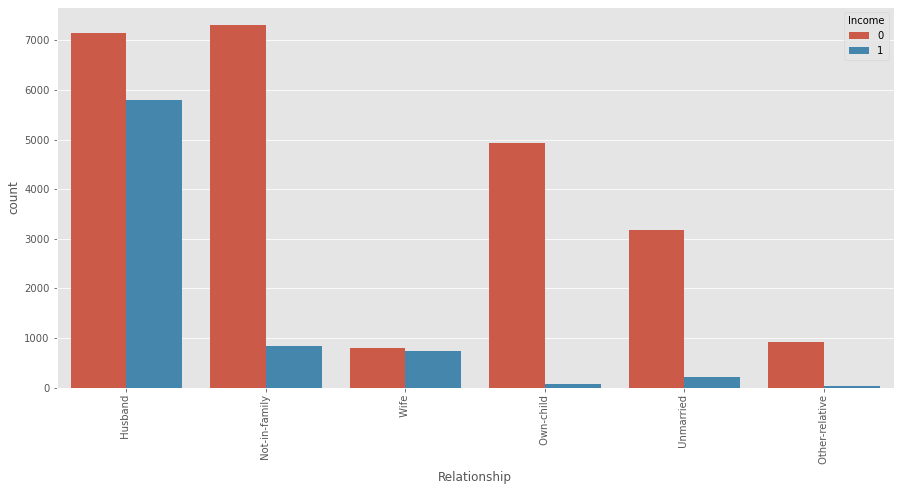

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=90)
plt.show()

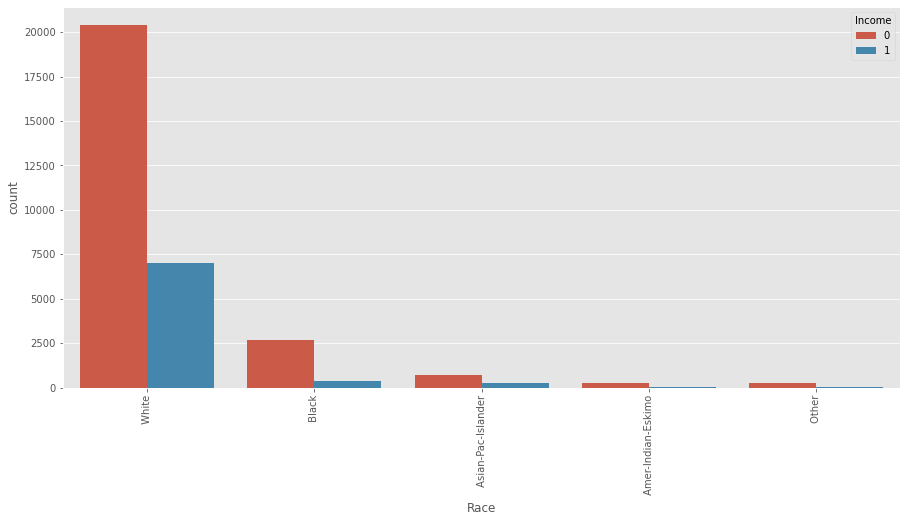

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x='Race',hue='Income',data=df)
plt.xticks(rotation=90)
plt.show()

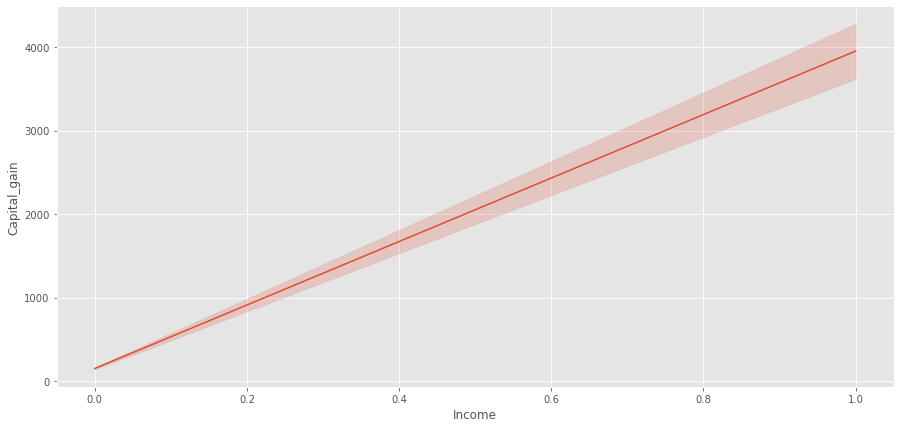

In [42]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Income',y='Capital_gain',data=df)

plt.show()

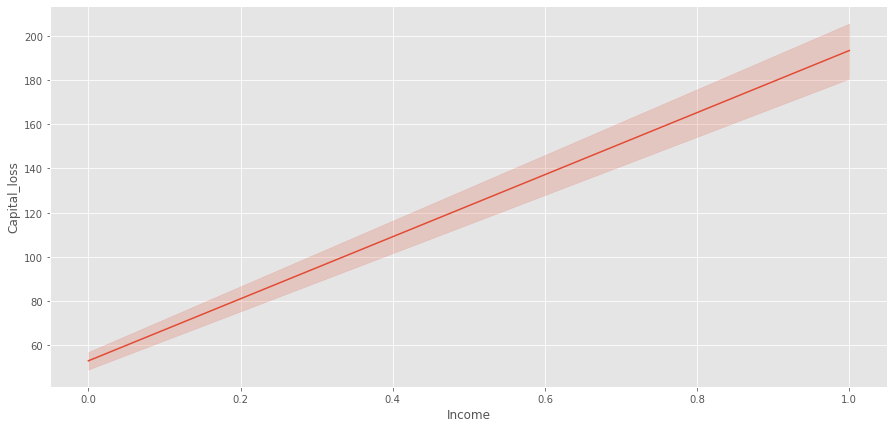

In [43]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Income',y='Capital_loss',data=df)

plt.show()

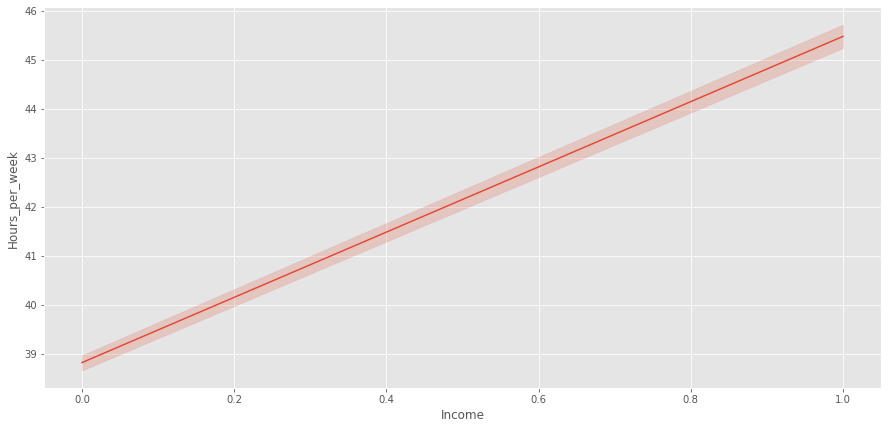

In [44]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Income',y='Hours_per_week',data=df)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

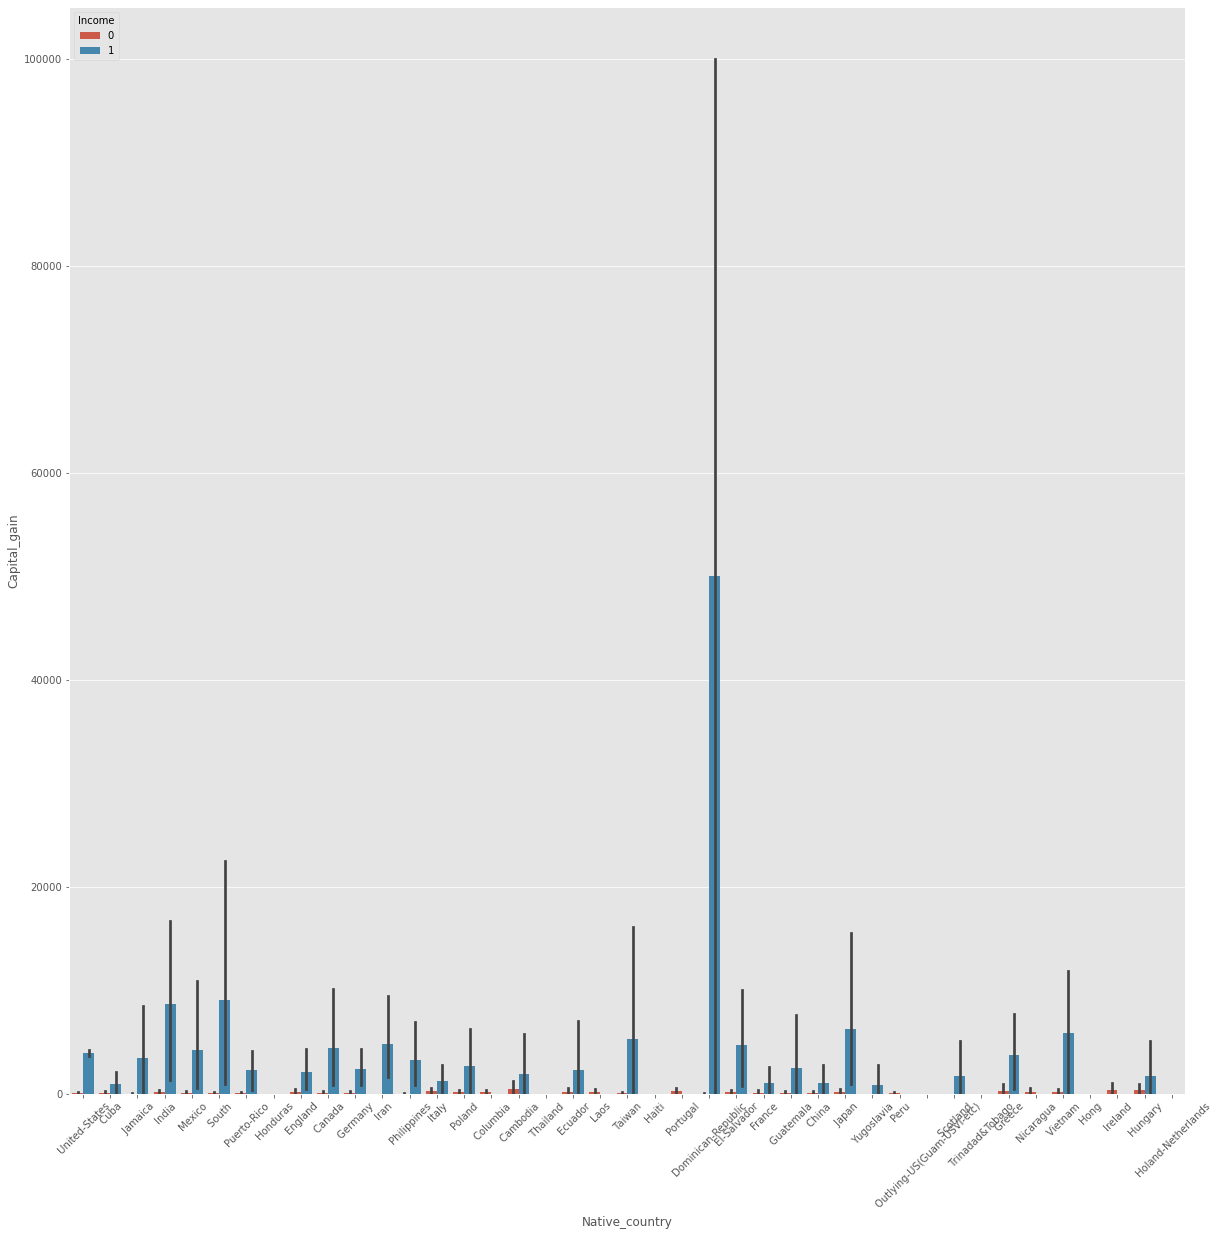

In [45]:
plt.figure(figsize=(20,20))
sns.barplot(x='Native_country',y='Capital_gain',hue='Income',data=df)
plt.xticks(rotation=45)

# Observation:-

1.Male has more >50K income compared to female.

2.Unindentified workclass has higher income than other workclass.

3.Lower finlwt has > 50K income.

4.Bachelors, HS-Grad, Masters and Doctorate income has >50K while other degrees falls below <=50k income category.

5.Marriage_civ_ spouse has higher income than other category.

6.Exces_Managerial and Professor occupation shows that these profession higher people in the category of >50K salary.



7.White people lie on high category of Income.

8.Capital gain, capital loss , hours of works, is directly propostion to income.

9.The people of portugal has higher income >50K

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [48]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [49]:
categorial_columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

df[categorial_columns]=df[categorial_columns].apply(le.fit_transform)

In [50]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


<Figure size 1080x1080 with 0 Axes>

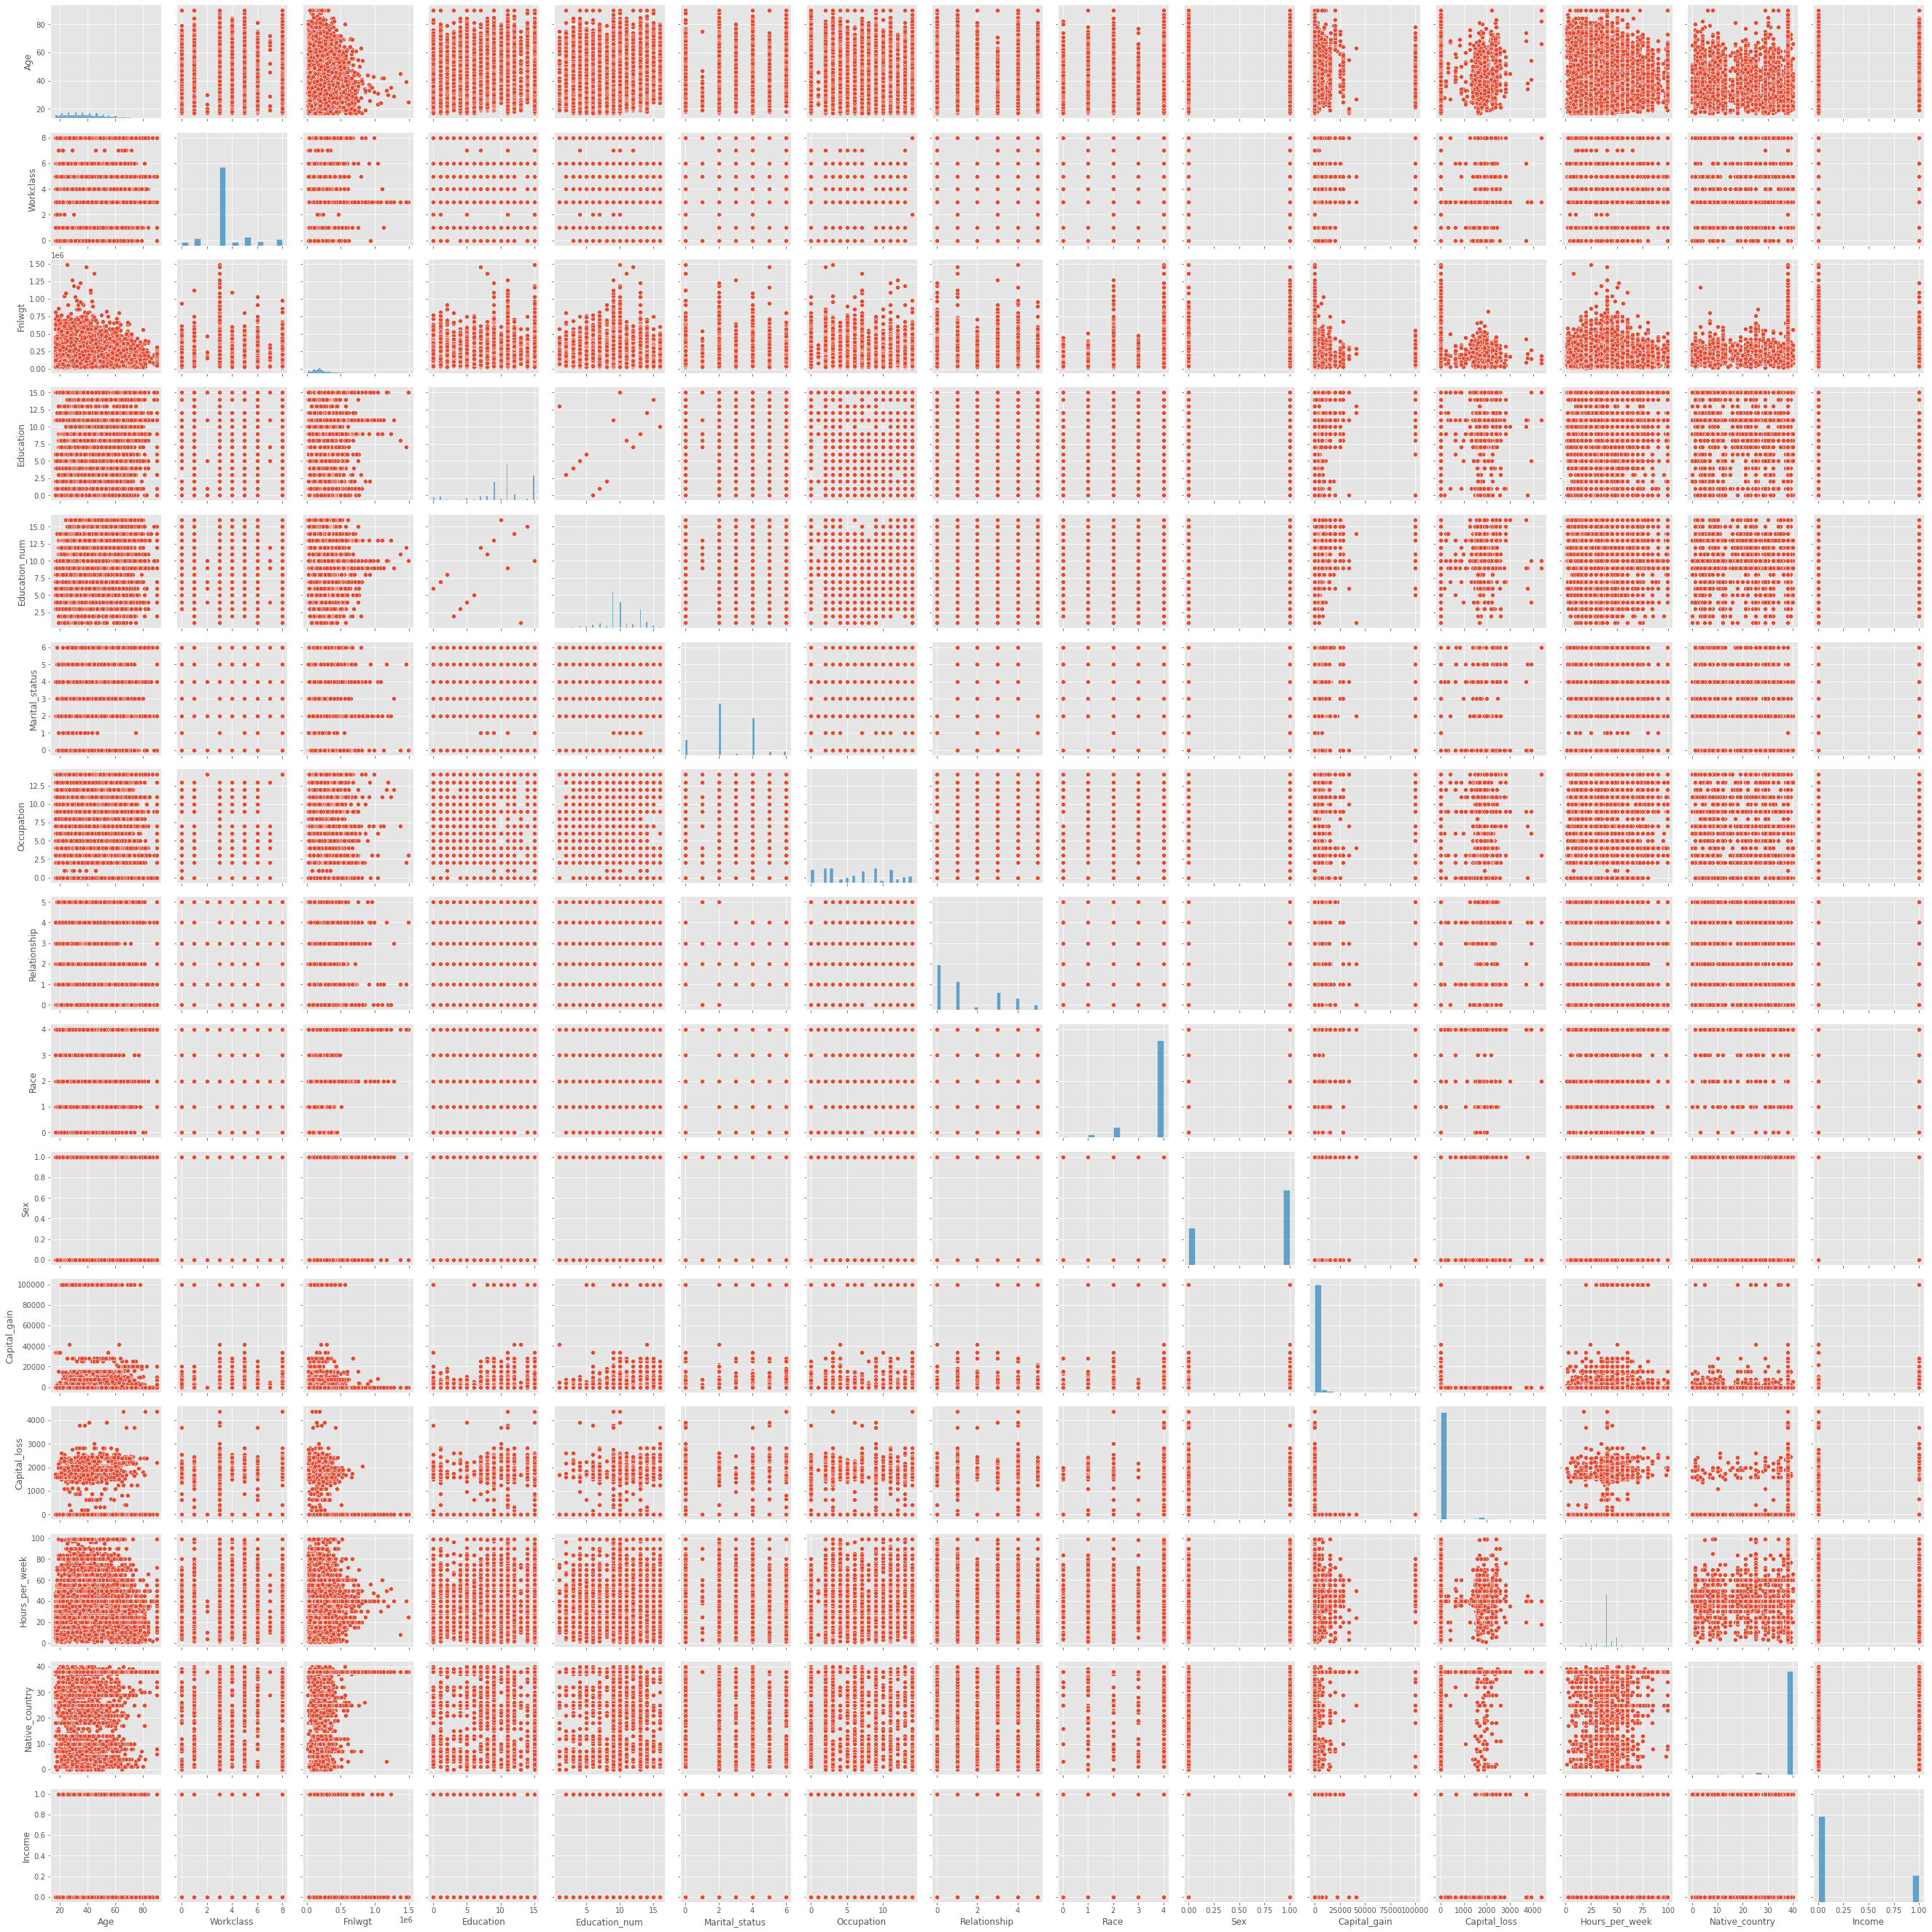

In [51]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

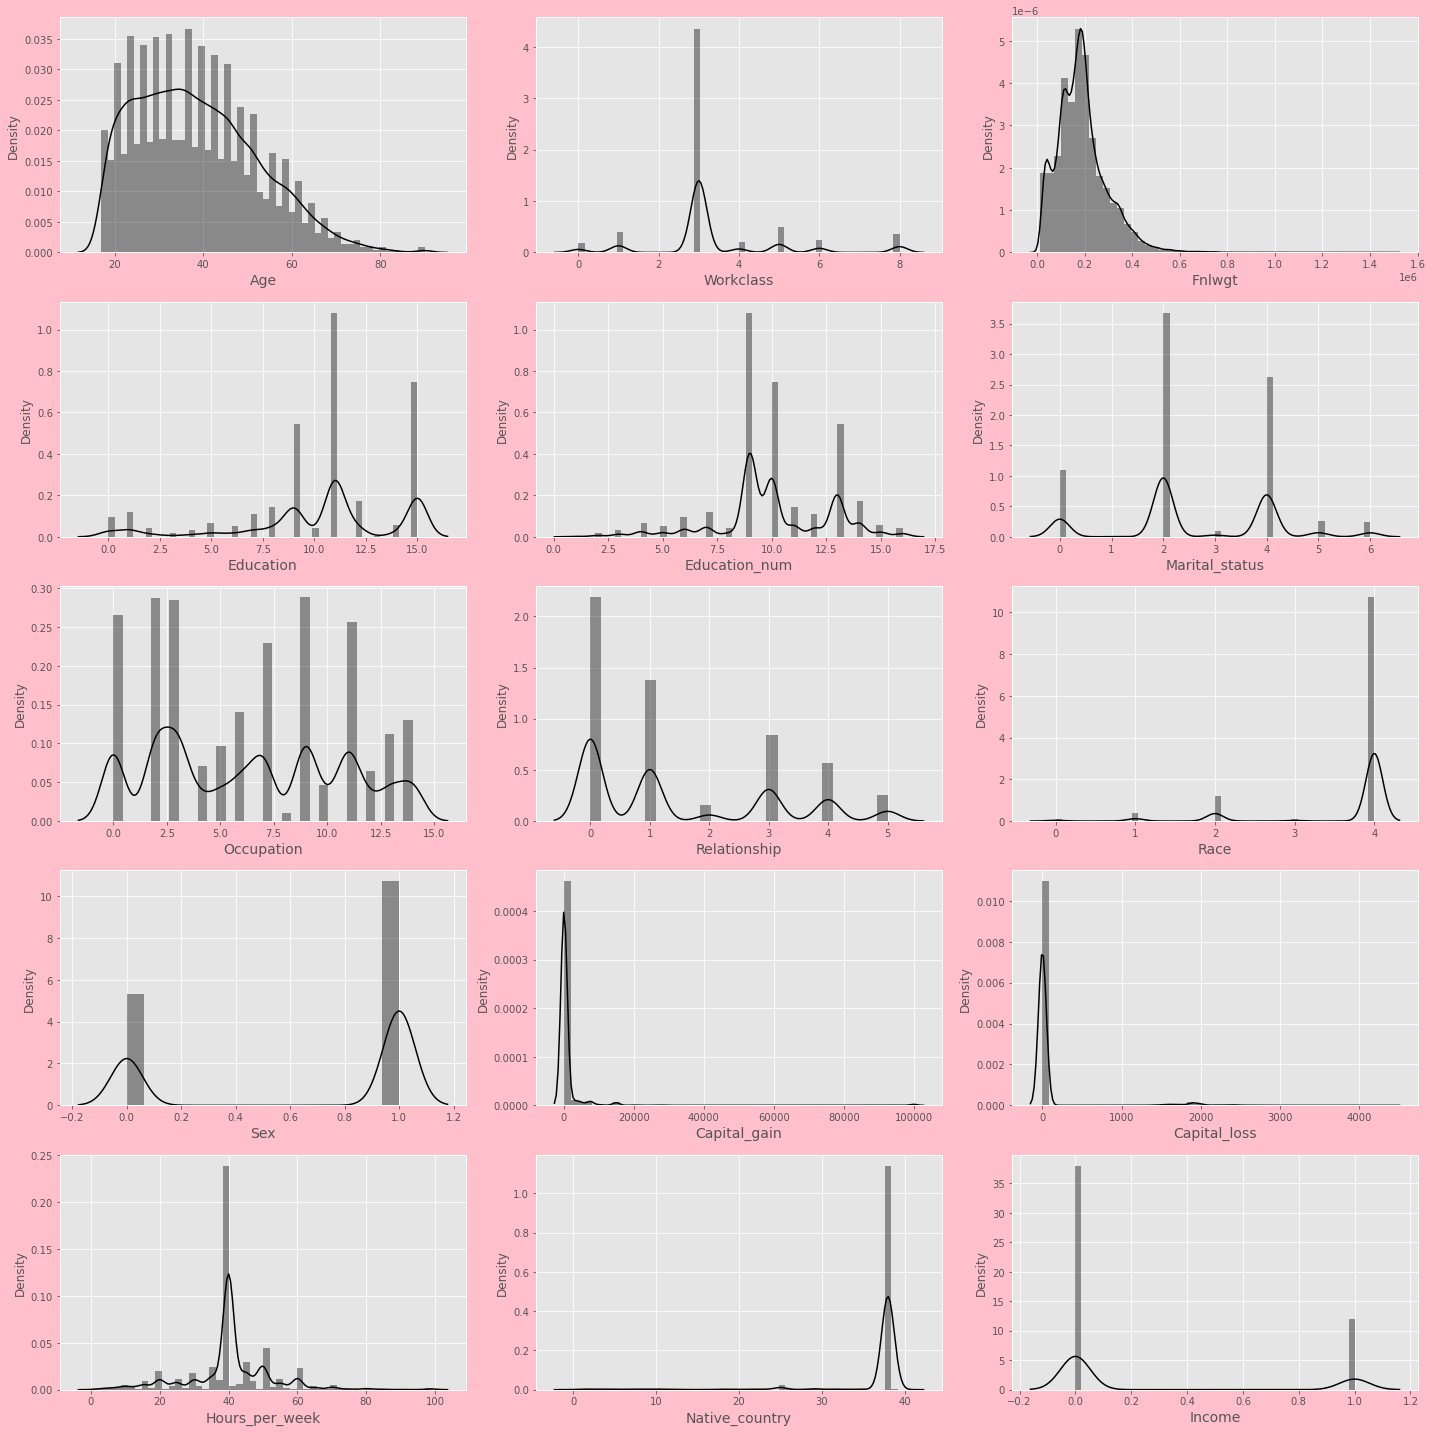

In [52]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

# Observation:- skewness is there in most of the features, we have to treat them moving forward

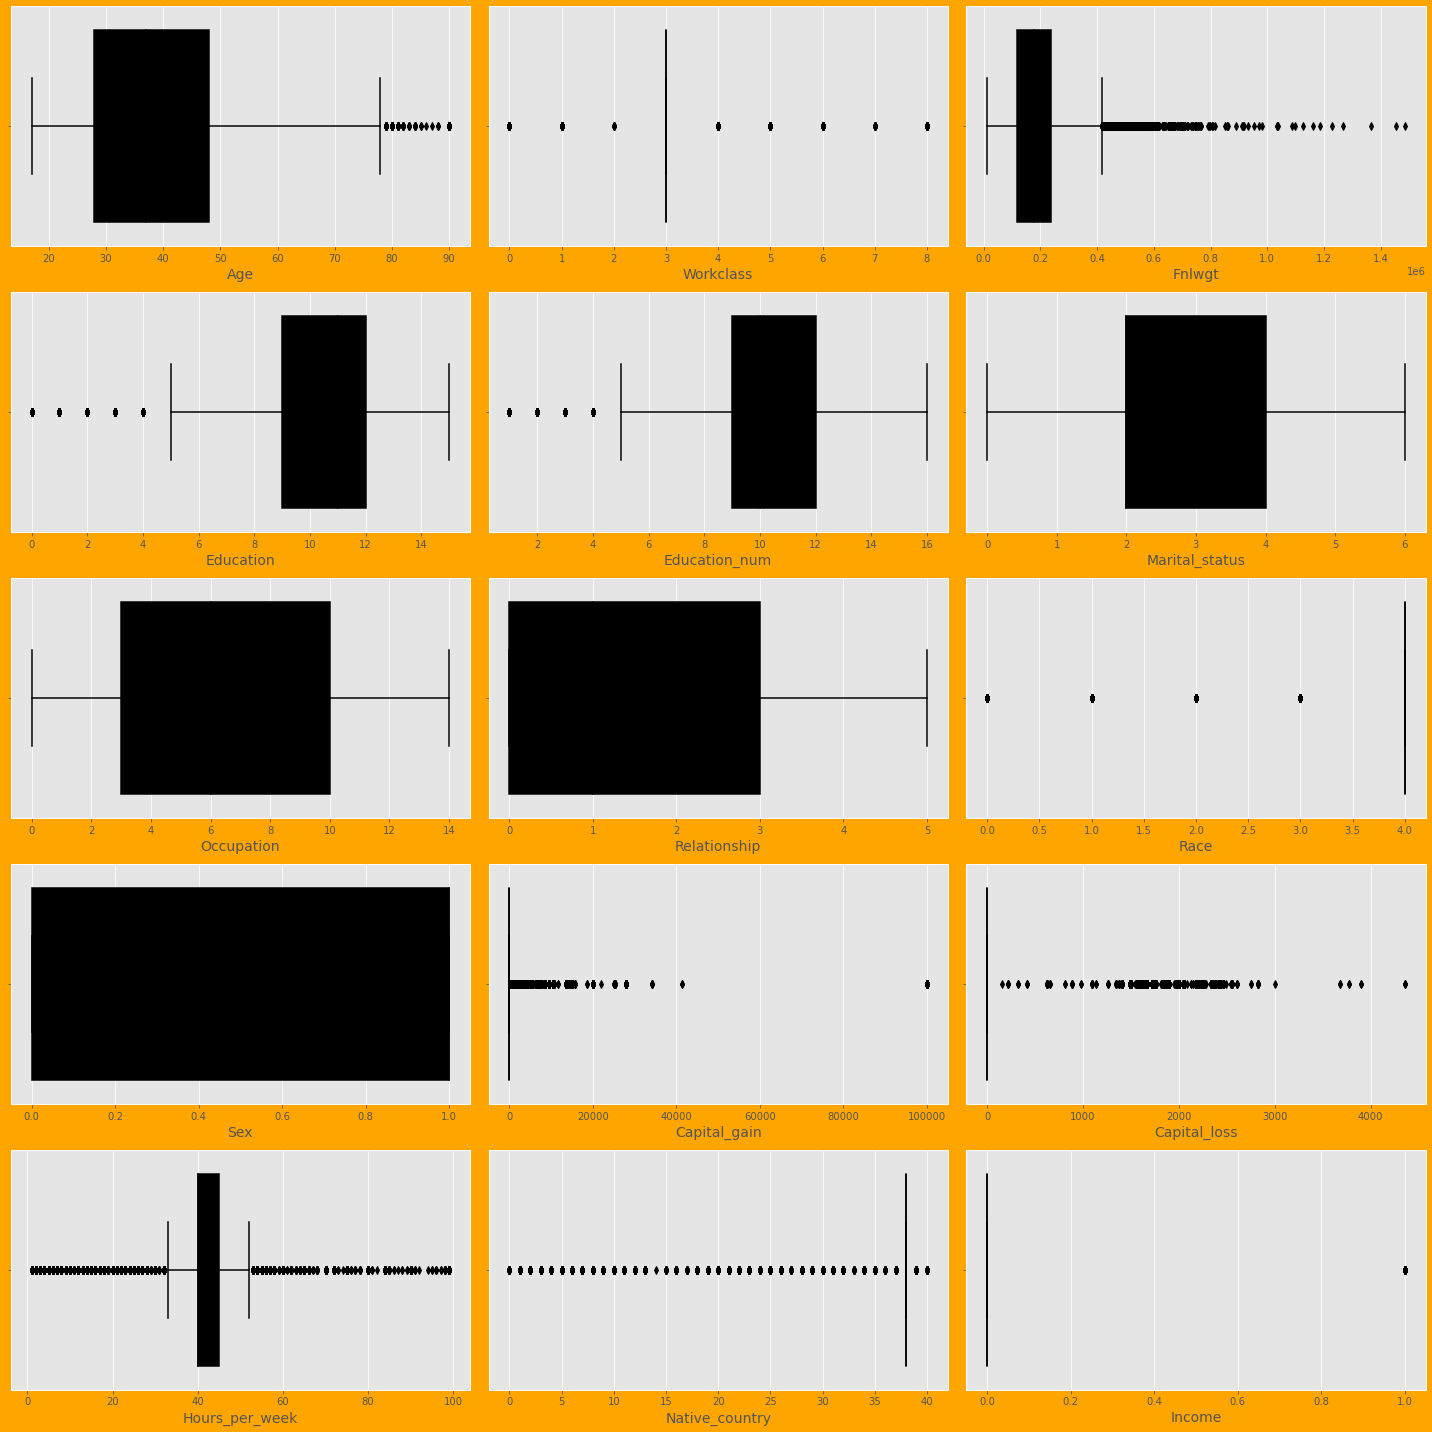

In [53]:
plt.figure(figsize=(20,20),facecolor='orange')

plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

# Observation:- Most of the features having outliers

In [54]:
## Removing outlier through Zscore

from scipy.stats import zscore
df.shape

(31954, 15)

In [55]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [56]:
df.shape

(29565, 15)

In [57]:
data_loss=31954-29565
print(data_loss)

2389


In [58]:
print((2389/31954)*100)

7.4763722851599175


# Observation:- Around 7.5 percent loss in data so we can proceed

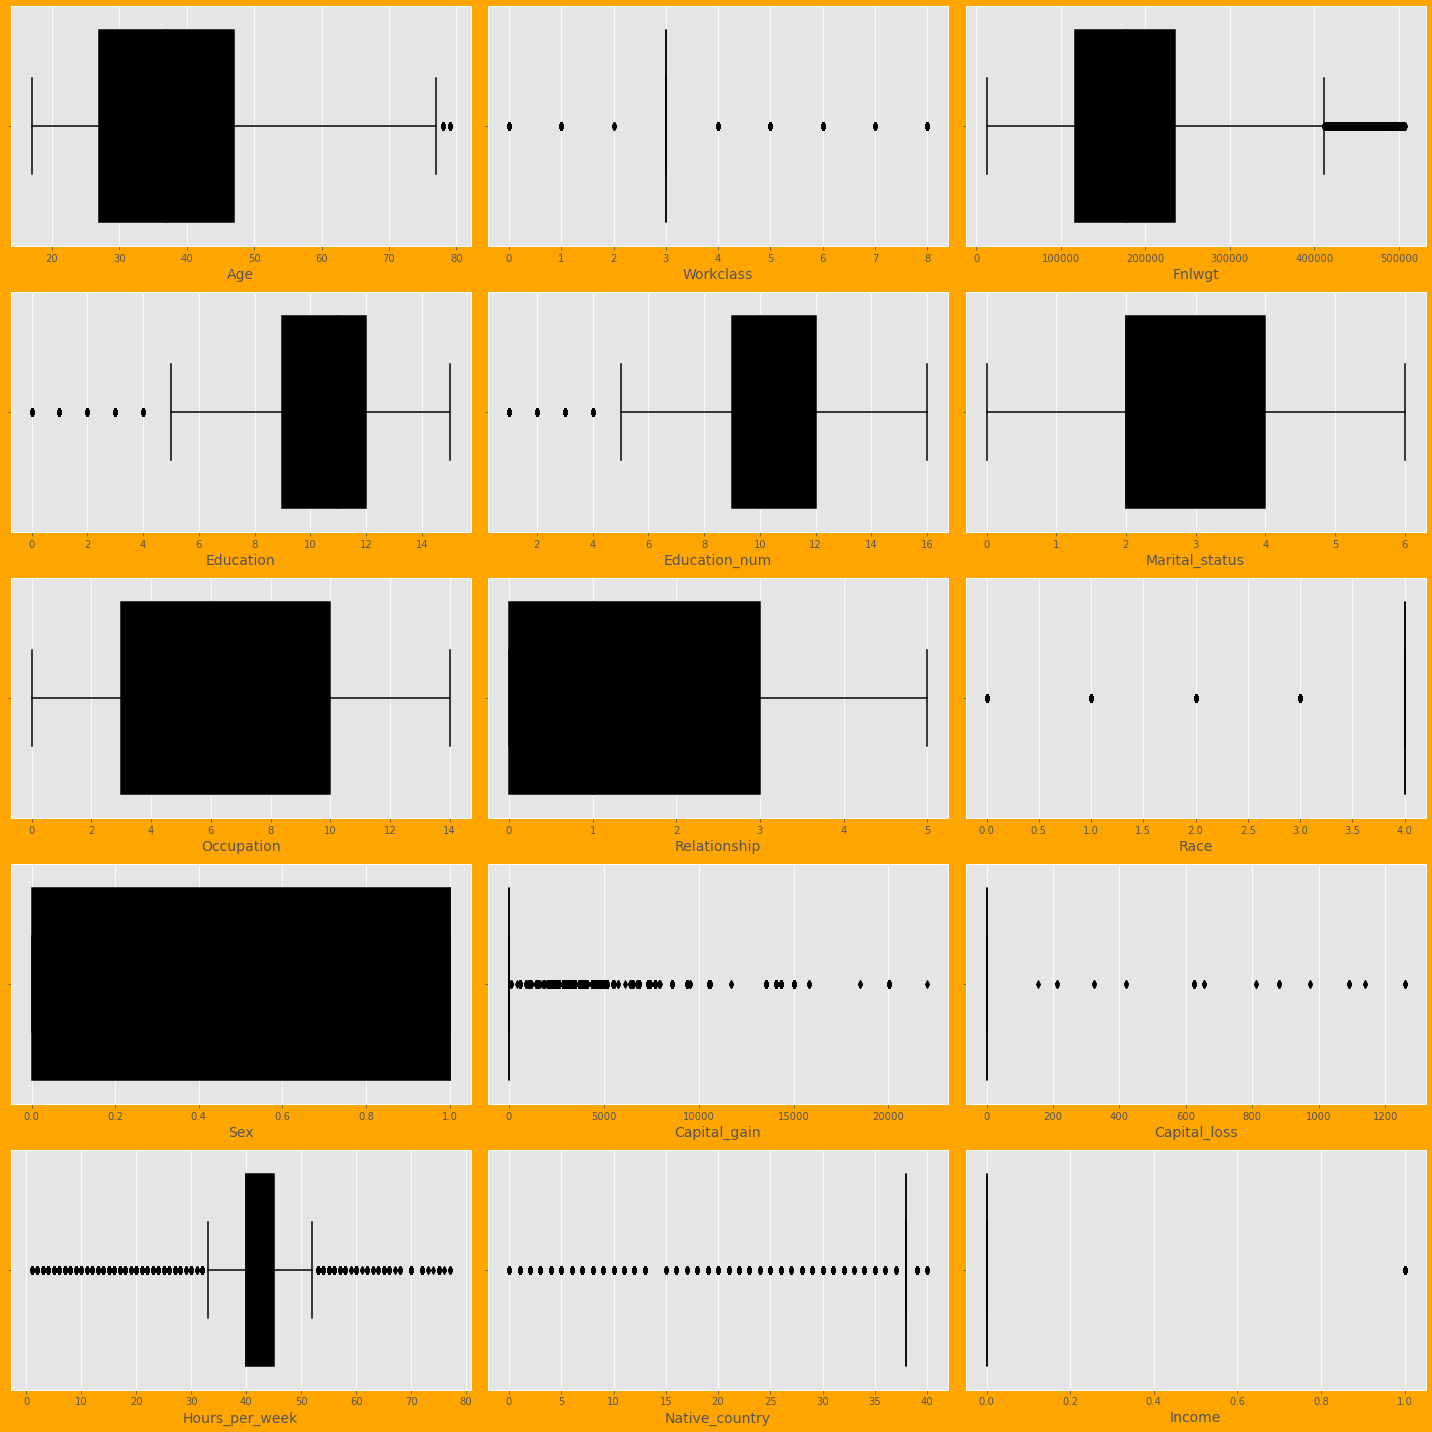

In [59]:
plt.figure(figsize=(20,20),facecolor='orange')

plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [60]:
     # Checking skewness

df.skew()

Age                0.492924
Workclass          1.187644
Fnlwgt             0.633398
Education         -0.929785
Education_num     -0.317854
Marital_status    -0.044227
Occupation         0.133199
Relationship       0.742858
Race              -2.476473
Sex               -0.675730
Capital_gain       4.961813
Capital_loss      29.357353
Hours_per_week    -0.408059
Native_country    -4.184090
Income             1.340381
dtype: float64

In [61]:
# Separating target variable and features
X=df.drop('Income',axis=1)
y=df.Income

In [62]:
# Treating Skewness 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [63]:
x=pd.DataFrame(pt.fit_transform(X),columns=X.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.918837,1.050929,-1.113237,-0.470849,1.217996,-0.391053,-0.689376,-1.113156,0.408938,0.717681,-0.295886,-0.040745,-2.174688,0.298100
1,0.124894,-0.150190,0.422382,0.092696,-0.447272,-1.767658,-0.185134,0.092741,0.408938,0.717681,-0.295886,-0.040745,-0.029419,0.298100
2,1.092774,-0.150190,0.601748,-2.056605,-1.197527,-0.391053,-0.185134,-1.113156,-2.455413,0.717681,-0.295886,-0.040745,-0.029419,0.298100
3,-0.710499,-0.150190,1.478208,-0.470849,1.217996,-0.391053,0.657701,1.547627,-2.455413,-1.393377,-0.295886,-0.040745,-0.029419,-3.372507
4,0.049940,-0.150190,1.041457,0.394971,1.664481,-0.391053,-0.689376,1.547627,0.408938,-1.393377,-0.295886,-0.040745,-0.029419,0.298100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29560,-0.806665,-0.150190,0.805687,-0.975691,0.782984,-0.391053,1.204869,1.547627,0.408938,-1.393377,-0.295886,-0.040745,-0.210876,0.298100
29561,0.270146,-0.150190,-0.209648,0.092696,-0.447272,-0.391053,0.041989,-1.113156,0.408938,0.717681,-0.295886,-0.040745,-0.029419,0.298100
29562,1.365638,-0.150190,-0.237270,0.092696,-0.447272,2.161835,-1.711802,1.338901,0.408938,-1.393377,-0.295886,-0.040745,-0.029419,0.298100
29563,-1.335152,-0.150190,0.284540,0.092696,-0.447272,0.906629,-1.711802,1.066976,0.408938,0.717681,-0.295886,-0.040745,-1.691529,0.298100


In [64]:
x.skew()

Age               -0.016976
Workclass          0.135660
Fnlwgt            -0.035630
Education         -0.316043
Education_num      0.029926
Marital_status    -0.126078
Occupation        -0.203862
Relationship       0.103893
Race              -2.038100
Sex               -0.675730
Capital_gain       3.083956
Capital_loss      24.503672
Hours_per_week     0.100768
Native_country    -2.940973
dtype: float64

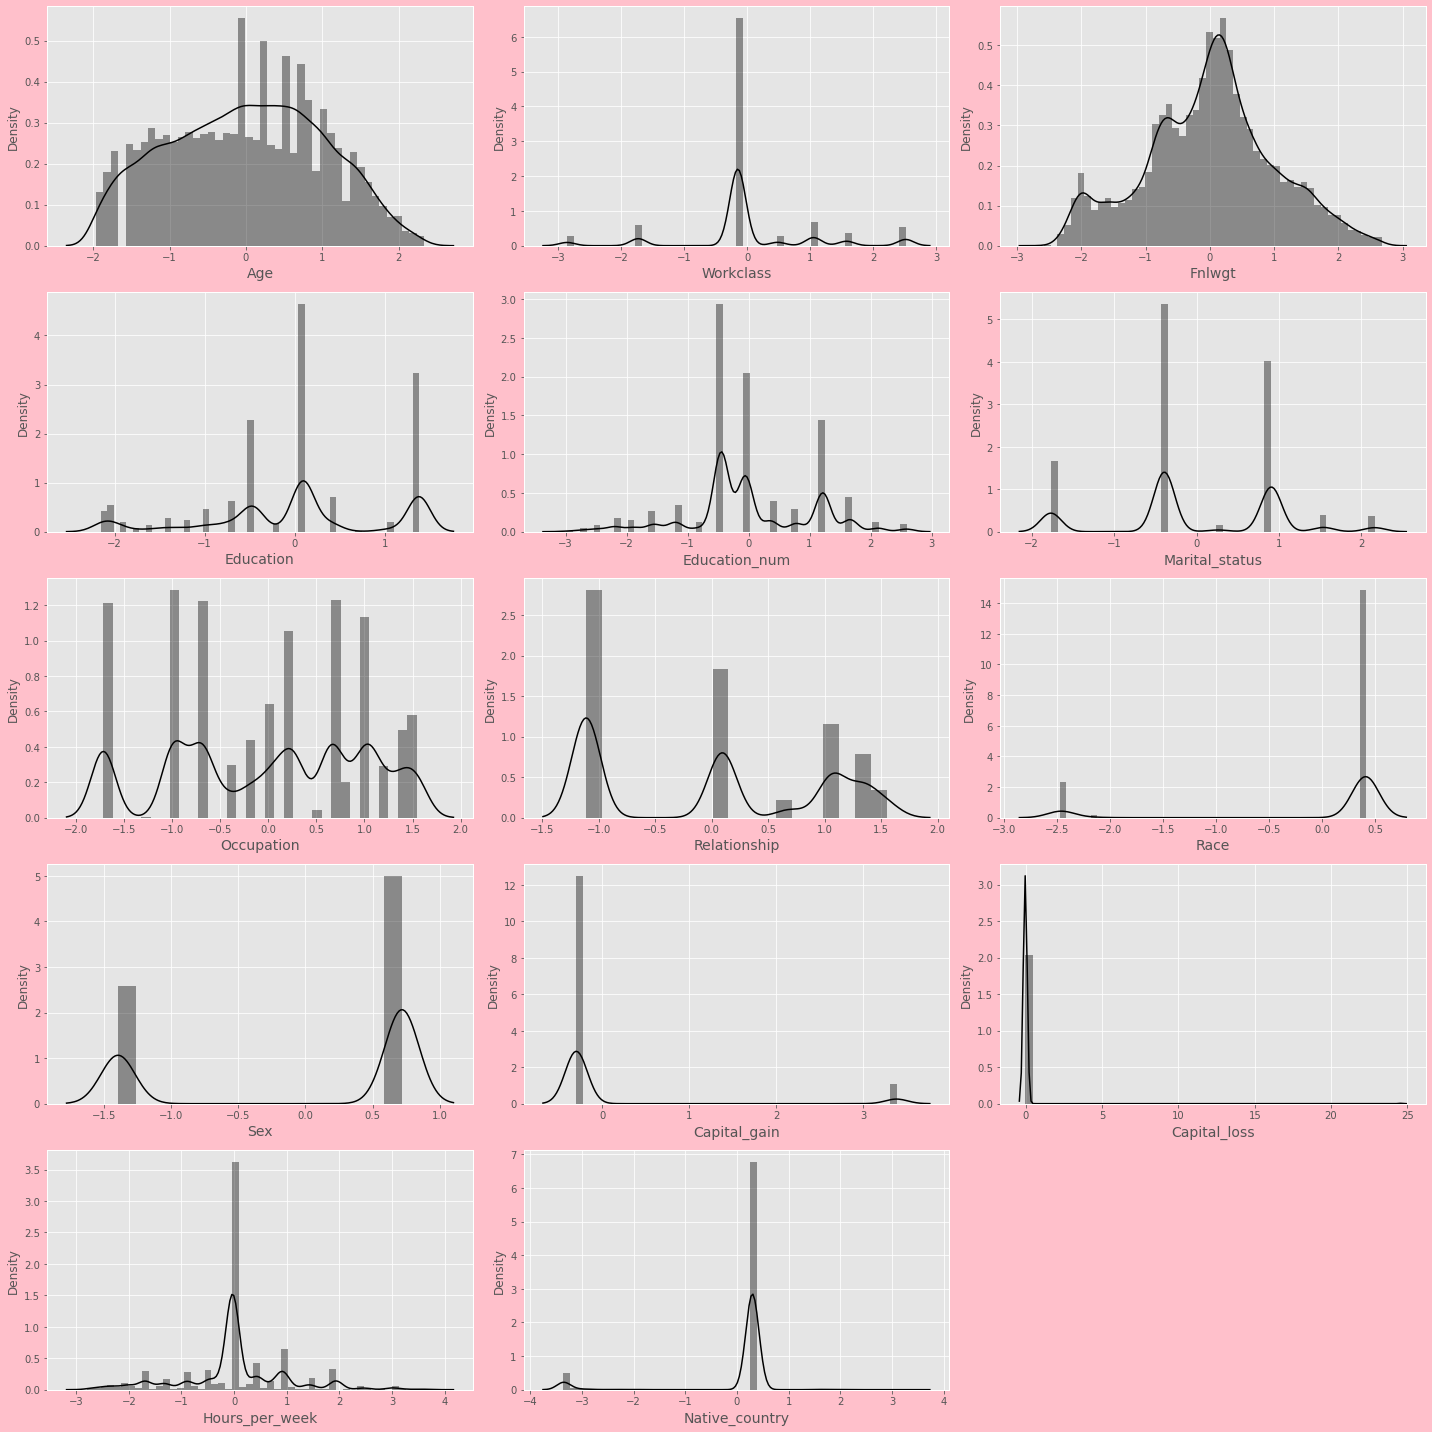

In [65]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1

for column in x:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(x[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

# Observation:- Still finding some skewness we have to treat going forward

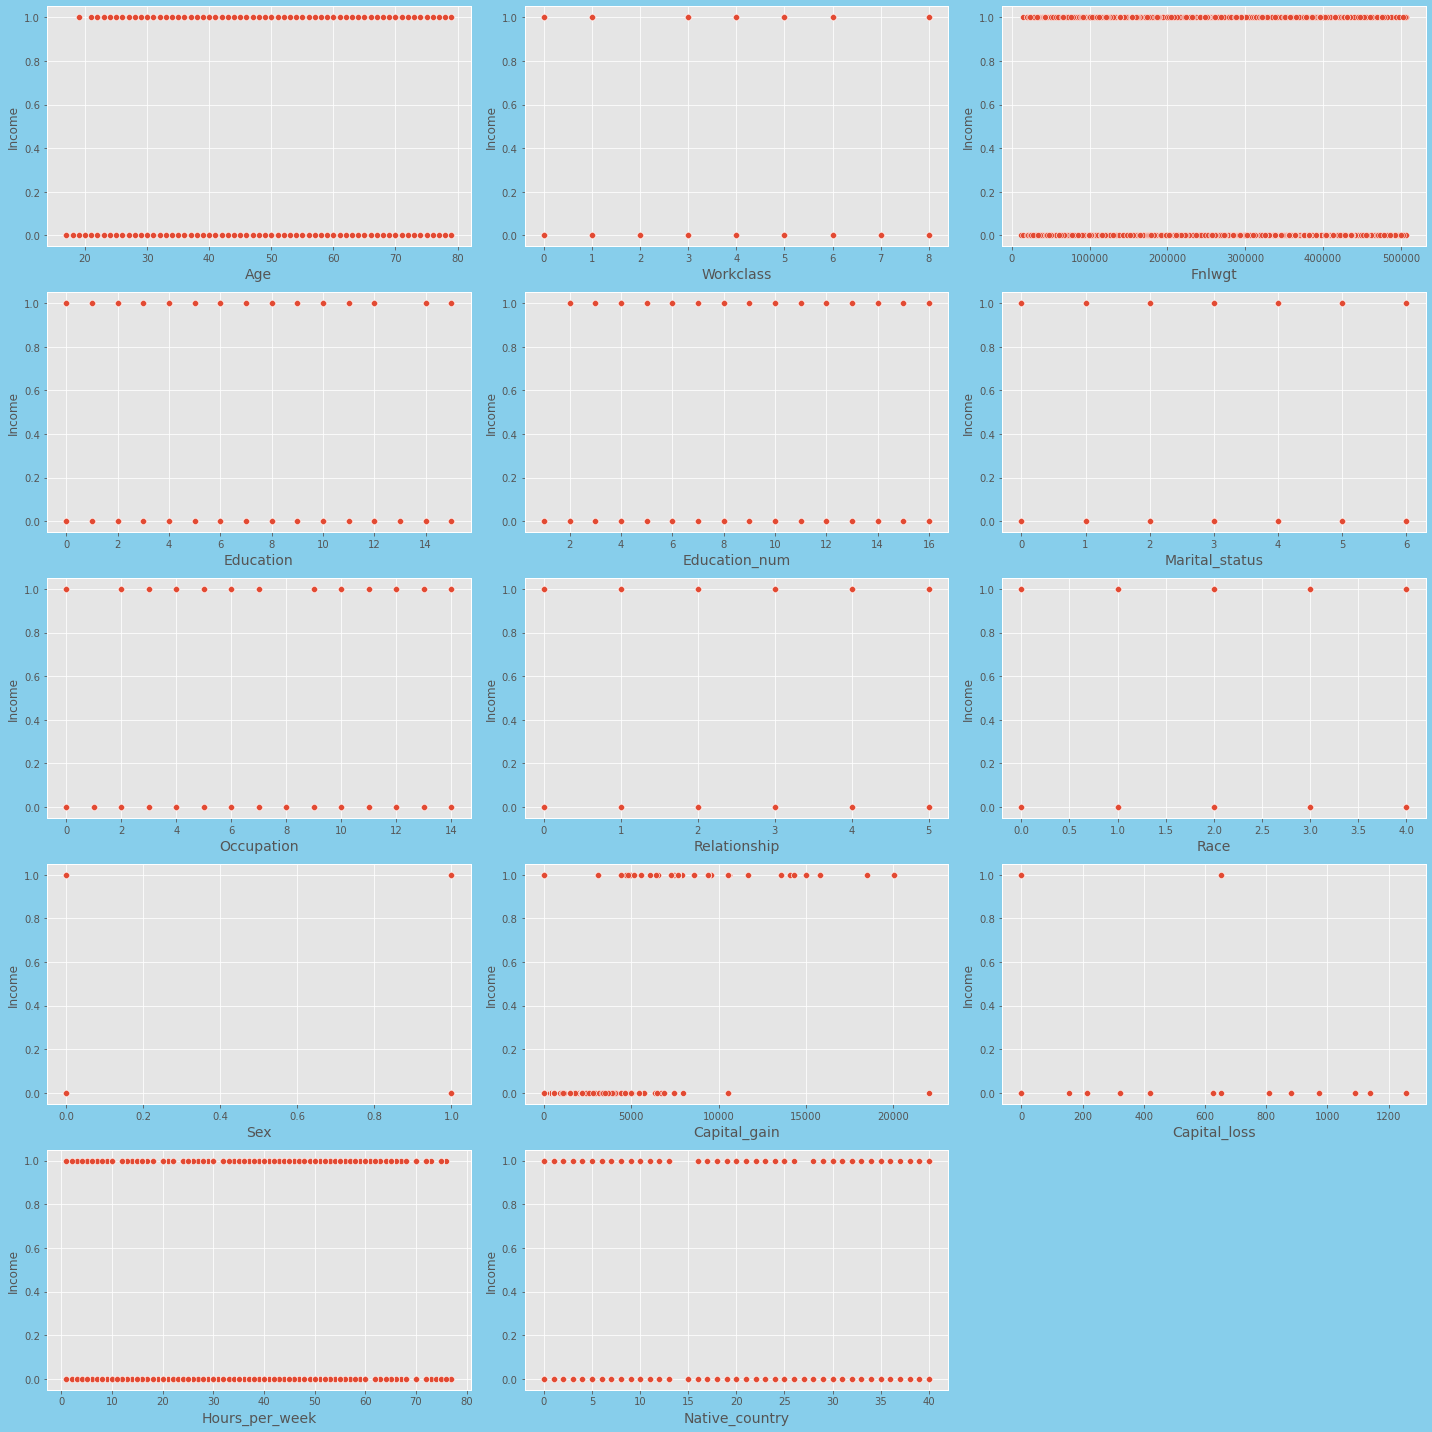

In [66]:
plt.figure(figsize=(20,20),facecolor='skyblue')

plotnumber=1

for column in x:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.scatterplot(df[column],y=df.Income)
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [67]:
x.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Age,1.000000,0.005106,-0.065444,-0.020024,0.070538,-0.326526,-0.008561,-0.353911,0.021209,0.097295,0.122299,0.020963,0.138418,0.007028
Workclass,0.005106,1.000000,-0.016338,-0.015855,-0.066271,0.043897,0.254216,0.006549,0.034814,0.010460,-0.010534,-0.007869,-0.084563,-0.002696
Fnlwgt,-0.065444,-0.016338,1.000000,-0.023007,-0.042079,0.028388,-0.005222,0.017743,-0.043663,0.025084,-0.004124,-0.000020,-0.019626,-0.089286
Education,-0.020024,-0.015855,-0.023007,1.000000,0.270818,-0.024045,-0.055323,0.006553,0.018273,-0.036339,0.009866,-0.004403,0.034856,0.102363
Education_num,0.070538,-0.066271,-0.042079,0.270818,1.000000,-0.060359,0.046372,-0.103878,0.054378,0.010250,0.107882,0.008849,0.154456,0.112487
Marital_status,-0.326526,0.043897,0.028388,-0.024045,-0.060359,1.000000,0.050872,0.262333,-0.077233,-0.114901,-0.061528,-0.018240,-0.189399,-0.031476
Occupation,-0.008561,0.254216,-0.005222,-0.055323,0.046372,0.050872,1.000000,-0.024285,-0.005580,0.050431,0.003282,-0.001563,-0.050023,-0.001326
Relationship,-0.353911,0.006549,0.017743,0.006553,-0.103878,0.262333,-0.024285,1.000000,-0.139081,-0.601195,-0.107733,0.031679,-0.280912,-0.015391
Race,0.021209,0.034814,-0.043663,0.018273,0.054378,-0.077233,-0.005580,-0.139081,1.000000,0.109951,0.030373,-0.002189,0.060723,0.150027
Sex,0.097295,0.010460,0.025084,-0.036339,0.010250,-0.114901,0.050431,-0.601195,0.109951,1.000000,0.065118,-0.032197,0.233591,-0.001748


<AxesSubplot:>

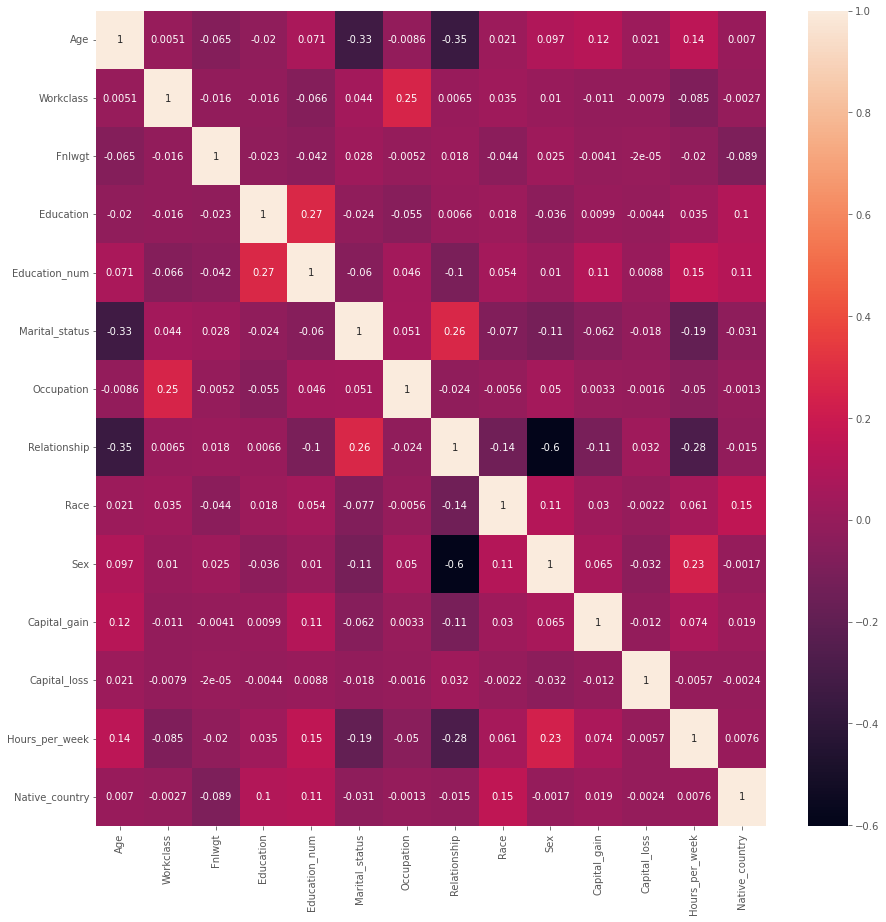

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True,annot_kws={'size':10})

# Since no any multicolinearity exist so we can proceed

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [70]:
scaler=StandardScaler()

In [71]:
x_scaled=scaler.fit_transform(x)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.271321,Age
1,1.084885,Workclass
2,1.015900,Fnlwgt
3,1.095157,Education
4,1.147655,Education_num
5,1.176332,Marital_status
6,1.087383,Occupation
7,1.915173,Relationship
8,1.051818,Race
9,1.637899,Sex


In [74]:
## Transforming features into components through PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 0.8741201 ,  0.06832718, -0.98496604, ...,  1.06744586,
        -1.77753988, -0.0143428 ],
       [ 0.88039046,  0.1600211 ,  0.40080967, ..., -1.06703654,
        -0.42702025,  0.58987879],
       [ 0.65292885,  2.35533007,  1.49338831, ...,  0.51073323,
        -0.37969459, -0.23992449],
       ...,
       [-1.62150853, -0.9700965 ,  0.83819377, ...,  2.36554754,
         1.43050336,  0.44372138],
       [-1.74062482, -0.25716609,  0.54310661, ...,  0.06929967,
        -0.89839985,  0.81893208],
       [-0.40486832, -0.80067789,  0.32996176, ...,  0.02404557,
         0.58259513,  0.53666961]])

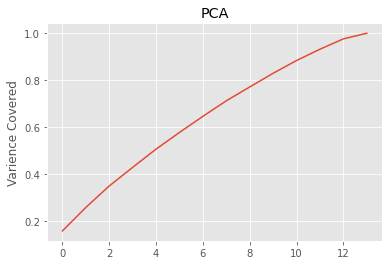

In [75]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

# Observation:- Around 12 components covers varaince of 98% of data

In [76]:
pca=PCA(n_components=12)
new_pcomp=pca.fit_transform(x_scaled)
p_c=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [77]:
p_c

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.874120,0.068327,-0.984966,0.880927,-0.835287,-0.316985,-0.331154,-0.109158,-0.271042,1.717067,1.262677,1.067446
1,0.880390,0.160021,0.400810,0.212974,-0.603603,0.253627,-0.109698,-1.146544,-0.056661,-0.045961,-0.133328,-1.067037
2,0.652929,2.355330,1.493388,0.778946,0.253531,-0.306639,-0.375165,0.112262,-2.367580,-0.200185,-0.401588,0.510733
3,-2.190974,0.761097,1.563486,0.565438,3.722099,0.088991,-0.750960,-0.255284,1.056000,-1.203809,0.631330,-0.219246
4,-0.984630,-1.931569,0.276454,0.243701,0.487741,0.248194,0.361421,-1.368963,0.484206,-0.916009,0.169370,0.700330
...,...,...,...,...,...,...,...,...,...,...,...,...
29560,-1.603557,-0.327068,-0.593618,0.322390,0.157784,0.219148,0.590335,-0.765606,0.124098,-2.054329,0.653833,-0.319857
29561,1.135330,0.408188,-0.075010,-0.220641,-0.688372,0.122853,-0.308670,-0.130801,-0.255506,0.430876,0.207331,-0.270465
29562,-1.621509,-0.970097,0.838194,0.409058,-0.894487,-0.408188,0.305139,0.099942,0.325105,0.476863,-0.392875,2.365548
29563,-1.740625,-0.257166,0.543107,-1.334596,-1.170712,0.118533,0.548819,-0.129313,-0.109611,1.528517,0.040009,0.069300


In [78]:
p_c.skew()

PC1     -0.201812
PC2      0.756206
PC3     -0.136208
PC4      1.179796
PC5      0.712684
PC6     16.597669
PC7      1.412192
PC8      0.455766
PC9      0.300449
PC10    -0.042643
PC11     0.124167
PC12     0.297703
dtype: float64

<AxesSubplot:title={'center':'Features vs Target'}>

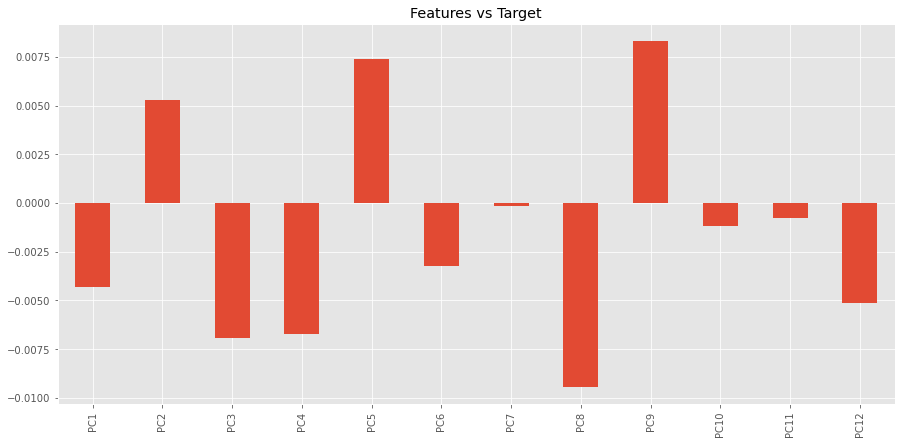

In [79]:
plt.figure(figsize=(15,7))
p_c.corrwith(y).plot(kind='bar',grid=True,title='Features vs Target')

<AxesSubplot:xlabel='Income', ylabel='count'>

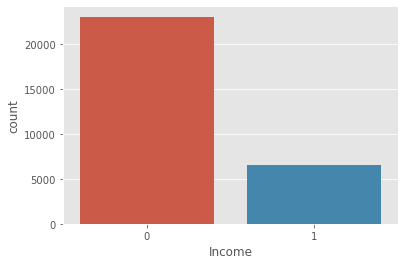

In [80]:
sns.countplot(y)

In [81]:
## Model Building 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,plot_roc_curve

In [82]:
x_train,x_test,y_train,y_test=train_test_split(p_c,y,test_size=0.25,random_state=446)

In [83]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('  Training Result  ')
        print('Accuracy_Score: ',accuracy_score(y_train,ypred)*100)
        
    elif train==False:
        y_pred=clf.predict(x_test)
        print('   Test Result    ')
        print('Accuracy_Score: ',accuracy_score(y_test,y_pred)*100)
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        plt.figure(figsize=(15,7))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='0.2f')
        

In [84]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [85]:
model(lr,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  82.68614982185541


   Test Result    
Accuracy_Score:  83.15746753246754
[[5457  303]
 [ 942  690]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5760
           1       0.69      0.42      0.53      1632

    accuracy                           0.83      7392
   macro avg       0.77      0.69      0.71      7392
weighted avg       0.82      0.83      0.82      7392



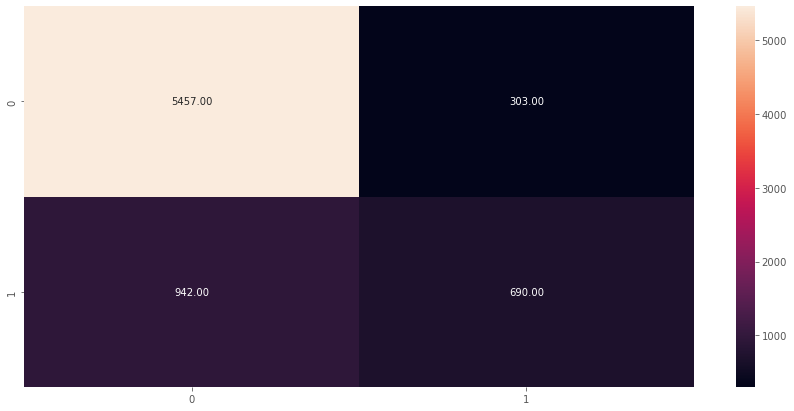

In [86]:
model(lr,x_train,x_test,y_train,y_test,train=False)

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
print('LogisticRegression',cross_val_score(lr,p_c,y,cv=5).mean())

LogisticRegression 0.8276002029426687


# KNN

In [89]:
knn=KNeighborsClassifier()

In [90]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
model(knn,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  87.57046858792225


   Test Result    
Accuracy_Score:  82.69751082251082
[[5223  537]
 [ 742  890]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5760
           1       0.62      0.55      0.58      1632

    accuracy                           0.83      7392
   macro avg       0.75      0.73      0.74      7392
weighted avg       0.82      0.83      0.82      7392



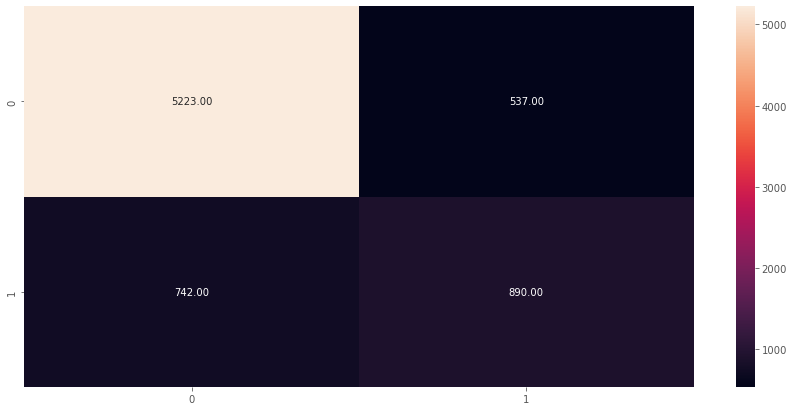

In [92]:
model(knn,x_train,x_test,y_train,y_test,train=False)

In [93]:
print('KNN',cross_val_score(knn,p_c,y,cv=5).mean())

KNN 0.8226281075596145


# SVM

In [94]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [95]:
model(svc,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  84.21954629504353


   Test Result    
Accuracy_Score:  84.23971861471861
[[5495  265]
 [ 900  732]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5760
           1       0.73      0.45      0.56      1632

    accuracy                           0.84      7392
   macro avg       0.80      0.70      0.73      7392
weighted avg       0.83      0.84      0.83      7392



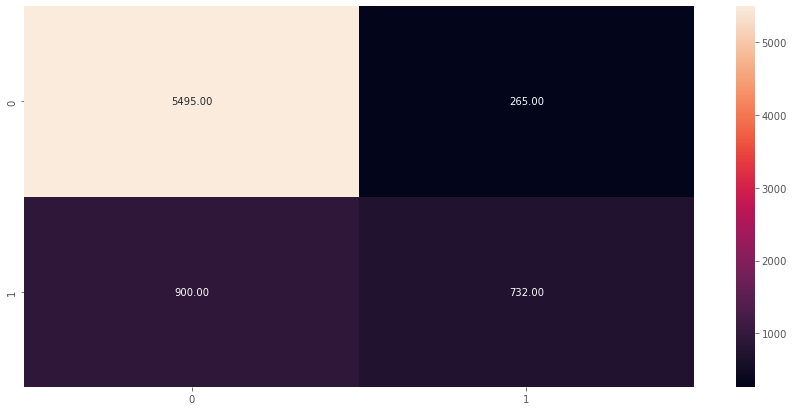

In [96]:
model(svc,x_train,x_test,y_train,y_test,train=False)

In [97]:
print('SVC',cross_val_score(svc,p_c,y,cv=5).mean())

SVC 0.836935565702689


# RandomForestClassifier

In [98]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
model(rf,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  100.0


   Test Result    
Accuracy_Score:  83.57683982683982
[[5365  395]
 [ 819  813]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5760
           1       0.67      0.50      0.57      1632

    accuracy                           0.84      7392
   macro avg       0.77      0.71      0.74      7392
weighted avg       0.82      0.84      0.83      7392



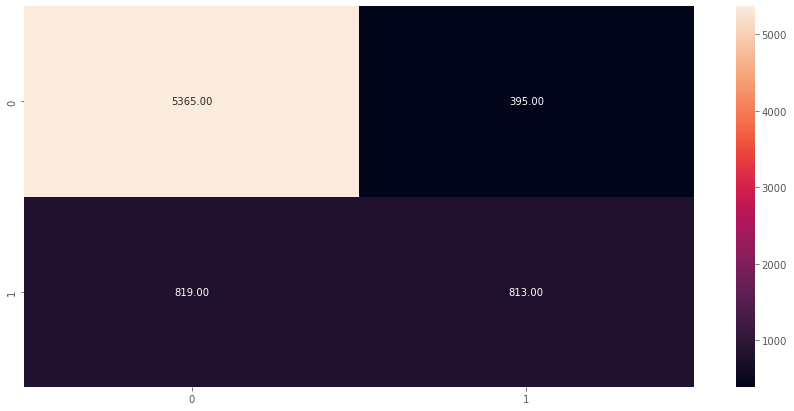

In [100]:
model(rf,x_train,x_test,y_train,y_test,train=False)

In [101]:
print('RandomForestClassifier',cross_val_score(rf,p_c,y,cv=5).mean())

RandomForestClassifier 0.8325046507694911


# Conclusion:- Random Forest is best performing

In [102]:
# Hyperparameter Tunnig
from sklearn.model_selection import GridSearchCV

In [103]:
params={'n_estimators':[100],
       'criterion':['gini'],
       'max_depth':[6,7,8,9],
       'min_samples_split':[4,5,6,7],
       'min_samples_leaf':[1,2,3,5]}

In [104]:
gv=GridSearchCV(rf,param_grid=params)
gv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [100]})

In [105]:
gv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [106]:
rf=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_leaf=4,min_samples_split=7,n_estimators=100)

In [107]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=7)

In [108]:
model(rf,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  86.63690073512831


   Test Result    
Accuracy_Score:  83.91504329004329
[[5473  287]
 [ 902  730]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5760
           1       0.72      0.45      0.55      1632

    accuracy                           0.84      7392
   macro avg       0.79      0.70      0.73      7392
weighted avg       0.83      0.84      0.82      7392



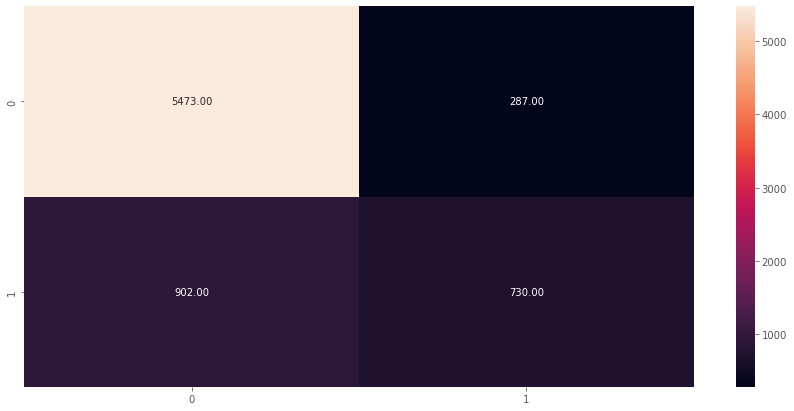

In [109]:
model(rf,x_train,x_test,y_train,y_test,train=False)

In [110]:
print('RandomForestClassifier',cross_val_score(rf,p_c,y,cv=5).mean())

RandomForestClassifier 0.8360223236935566


# Final Conclusion:-

1.Through Hyperparameter Tunning we have reduced the overfitting problem.

2.Accuracy Score for the model is 82%

3.F1 score is 82%

4.Cross_validation Score is 81.5%

5.KNN is second best performing model with 85% accuracy and F1 score is 85%

NameError: name 'dt' is not defined

<Figure size 1080x504 with 0 Axes>

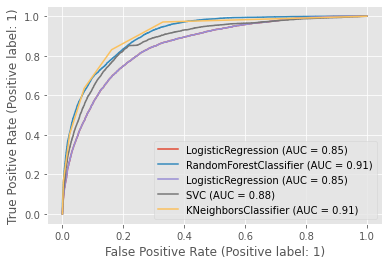

In [111]:
plt.figure(figsize=(15,7))
disp=plot_roc_curve(lr,p_c,y)
plot_roc_curve(rf,p_c,y,ax=disp.ax_)
plot_roc_curve(lr,p_c,y,ax=disp.ax_)
plot_roc_curve(svc,p_c,y,ax=disp.ax_)
plot_roc_curve(knn,p_c,y,ax=disp.ax_)
plot_roc_curve(dt,p_c,y,ax=disp.ax_)

In [ ]:
y_pred=rf.predict(x_test)
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
Report

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,hue=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
## Saving the model
import pickle
filename='Census_Report'
pickle.dump(rf,open(filename,'wb'))